In [ ]:
import numpy as np
import time


def _mean_squared_error(y, pred):
    return 0.5 * np.mean((y - pred) ** 2)


def _mean_abs_error(y, pred):
    return np.mean(np.abs(y, pred))


def _sigmoid(x):
    return 1. / (1. + np.exp(-x))


def _fourier(x):
    return np.sin(x)


def _hardlimit(x):
    return (x >= 0).astype(int)


def _identity(x):
    return x


def getActivation(name):
    return {
        'sigmoid': _sigmoid,
        'fourier': _fourier,
        'hardlimit': _hardlimit
    }[name]


def getLoss(name):
    return {
        'mse': _mean_squared_error,
        'mae': _mean_abs_error
    }[name]


class ELM:
    def __init__(self, num_input_nodes, num_hidden_units, num_out_units, activation='sigmoid',
                 loss='mse', beta_init=None, w_init=None, bias_init=None):
        self._num_input_nodes = num_input_nodes
        self._num_hidden_units = num_hidden_units
        self._num_out_units = num_out_units

        self._activation = getActivation(activation)
        self._loss = getLoss(loss)

        if isinstance(beta_init, np.ndarray):
            self._beta = beta_init
        else:
            self._beta = np.random.uniform(-1., 1., size=(self._num_hidden_units, self._num_out_units))

        if isinstance(w_init, np.ndarray):
            self._w = w_init
        else:
            self._w = np.random.uniform(-1, 1, size=(self._num_input_nodes, self._num_hidden_units))

        if isinstance(bias_init, np.ndarray):
            self._bias = bias_init
        else:
            self._bias = np.zeros(shape=(self._num_hidden_units,))

        print('Bias shape:', self._bias.shape)
        print('W shape:', self._w.shape)
        print('Beta shape:', self._beta.shape)

    def fit(self, X, Y, display_time=False):
        H = self._activation(X.dot(self._w) + self._bias)

        # Moore–Penrose pseudo inverse
        if display_time:
            start = time.time()
        H_pinv = np.linalg.pinv(H)
        if display_time:
            stop = time.time()
            print(f'Train time: {stop-start}')

        self._beta = H_pinv.dot(Y)

        # print('Fit Beta shape:', self._beta.shape)

    def __call__(self, X):
        H = self._activation(X.dot(self._w) + self._bias)
        return H.dot(self._beta)

    def evaluate(self, X, Y):
        pred = self(X)

        # Loss (base on model setting)
        loss = self._loss(Y, pred)

        # Accuracy
        acc = np.sum(np.argmax(pred, axis=-1) == np.argmax(Y, axis=-1)) / len(Y)

        # Unweighted Average Recall
        # TODO

        return loss, acc

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import random
import csv
import numpy
%matplotlib inline

In [ ]:
train = []
Y = []
X = []
X_n = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_1.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(numpy.array(r1[:len(r1)-7]))
        X_n.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    if (Yd[i][0]==0):
      Y1.append([1,0])
    else:
      Y1.append([0,1])
    if (Yd[i][1]==0):
      Y2.append([1,0])
    else:
      Y2.append([0,1])

    if (Yd[i][2]==0):
      Y3.append([1,0])
    else:
      Y3.append([0,1])

    if (Yd[i][3]==0):
      Y4.append([1,0])
    else:
      Y4.append([0,1])
    
    if (Yd[i][4]==0):
      Y5.append([1,0])
    else:
      Y5.append([0,1])

    if (Yd[i][5]==0):
      Y6.append([1,0])
    else:
      Y6.append([0,1])

    if (Yd[i][6]==0):
      Y7.append([1,0])
    else:
      Y7.append([0,1])


In [ ]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.116211,0.004995,0.000019,0.0,0.0,0.003615,6.310000e-07,0.044054,1.0,0.964577,1.0,0.042807,0.000732,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.024805,0.001061,0.000004,0.0,0.0,0.085165,1.490000e-05,0.000397,1.0,0.939191,1.0,1.000000,0.000319,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.044434,0.001912,0.000007,0.0,0.0,0.085165,9.030000e-06,0.001177,1.0,0.971432,1.0,1.000000,0.000204,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.019434,0.834835,0.000003,0.0,0.0,0.085165,1.500000e-05,0.000310,1.0,0.572206,1.0,1.000000,0.000377,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.028223,0.001211,0.000005,0.0,0.0,0.085020,1.450000e-05,0.000466,1.0,0.687067,1.0,1.000000,0.000021,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [ ]:
train = []
Y = []
X = []
X_n = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_1.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            if(float(row[j])<0):
              continue
            r1.append(float(row[j]))
        if(len(r1)!=len(row)):
          continue
        X.append(numpy.array(r1[:len(r1)-7]))
        X_n.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

    
df = pd.DataFrame(X)
print(df.head())

df_train = pd.DataFrame(Yd)
print(df_train.head())

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(df,df_train)

    0         1         2         3    4    5   ...   17   18   19   20   21   22
0  1.0  0.116211  0.004995  0.000019  0.0  0.0  ...  1.0  0.0  0.0  0.0  1.0  1.0
1  1.0  0.024805  0.001061  0.000004  0.0  0.0  ...  0.0  1.0  0.0  0.0  0.0  1.0
2  1.0  0.044434  0.001912  0.000007  0.0  0.0  ...  0.0  0.0  0.0  0.0  1.0  1.0
3  1.0  0.019434  0.834835  0.000003  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0  1.0
4  1.0  0.028223  0.001211  0.000005  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.5

[5 rows x 23 columns]
     0    1    2    3    4    5    6
0  0.0  1.0  0.0  1.0  1.0  0.0  0.0
1  1.0  1.0  0.0  0.0  0.0  0.0  1.0
2  0.0  1.0  0.0  1.0  0.0  0.0  1.0
3  1.0  0.0  0.0  1.0  0.0  0.0  1.0
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0


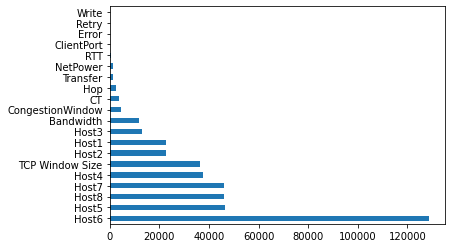

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(["Interval","Transfer","Bandwidth","Write","Error","Retry","CongestionWindow","RTT","NetPower","ServerPort","ClientPort","Window Buffer Size", "TCP Window Size","CT","Host1","Host2","Host3","Host4","Host5","Host6","Host7","Host8","Hop"])
#concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(20,'Score'))  #print 10 best features
feat_importances = pd.Series(fit.scores_, index=["Interval","Transfer","Bandwidth","Write","Error","Retry","CongestionWindow","RTT","NetPower","ServerPort","ClientPort","Window Buffer Size", "TCP Window Size","CT","Host1","Host2","Host3","Host4","Host5","Host6","Host7","Host8","Hop"])
import matplotlib.pyplot as plt
%matplotlib inline
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
train = []
Y = []
X = []
X_n = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_1.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
          if j not in [14,15,16,17,18,19,20,21]:
              if(float(row[j])<0):
                continue
              r1.append(float(row[j]))
        if(len(r1)!=len(row)-8):
          continue
        X.append(numpy.array(r1[:len(r1)-7]))
        X_n.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

    
df = pd.DataFrame(X)
print(df.head())

df_train = pd.DataFrame(Yd)
print(df_train.head())

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(df,df_train)

    0         1         2         3   ...   11        12        13   14
0  1.0  0.116211  0.004995  0.000019  ...  1.0  0.042807  0.000732  1.0
1  1.0  0.024805  0.001061  0.000004  ...  1.0  1.000000  0.000319  1.0
2  1.0  0.044434  0.001912  0.000007  ...  1.0  1.000000  0.000204  1.0
3  1.0  0.019434  0.834835  0.000003  ...  1.0  1.000000  0.000377  1.0
4  1.0  0.028223  0.001211  0.000005  ...  1.0  1.000000  0.000021  0.5

[5 rows x 15 columns]
     0    1    2    3    4    5    6
0  0.0  1.0  0.0  1.0  1.0  0.0  0.0
1  1.0  1.0  0.0  0.0  0.0  0.0  1.0
2  0.0  1.0  0.0  1.0  0.0  0.0  1.0
3  1.0  0.0  0.0  1.0  0.0  0.0  1.0
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0


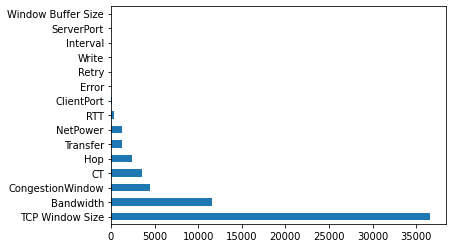

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(["Interval","Transfer","Bandwidth","Write","Error","Retry","CongestionWindow","RTT","NetPower","ServerPort","ClientPort","Window Buffer Size", "TCP Window Size","CT","Host1","Host2","Host3","Host4","Host5","Host6","Host7","Host8","Hop"])
#concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(20,'Score'))  #print 10 best features
feat_importances = pd.Series(fit.scores_, index=["Interval","Transfer","Bandwidth","Write","Error","Retry","CongestionWindow","RTT","NetPower","ServerPort","ClientPort","Window Buffer Size", "TCP Window Size","CT","Hop"])
import matplotlib.pyplot as plt
%matplotlib inline
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
train = []
Y = []
X = []
X_n = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_2.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            if(float(row[j])<0):
              continue
            r1.append(float(row[j]))
        if(len(r1)!=len(row)):
          continue
        X.append(numpy.array(r1[:len(r1)-7]))
        X_n.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    if (Yd[i][0]==0):
      Y1.append(0)
    else:
      Y1.append(1)
    
df = pd.DataFrame(X)
print(df.head())

df_train = pd.DataFrame(Yd)
print(df_train.head())

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(df,df_train)

    0         1         2         3         4   ...   18   19   20   21   22
0  1.0  0.273438  0.011712  0.000044  0.000000  ...  0.0  0.0  0.0  0.0  0.5
1  1.0  0.023926  0.001031  0.000004  0.000000  ...  0.0  0.0  0.0  1.0  1.0
2  1.0  0.021387  0.918919  0.000003  0.000000  ...  0.0  0.0  0.0  0.0  1.0
3  1.0  0.212891  0.009149  0.000034  0.000000  ...  1.0  0.0  0.0  0.0  1.0
4  1.0  0.000000  0.000000  0.000000  0.000205  ...  0.0  1.0  1.0  0.0  1.0

[5 rows x 23 columns]
     0    1    2    3    4    5    6
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
1  1.0  0.0  0.0  1.0  0.0  0.0  1.0
2  1.0  1.0  0.0  0.0  0.0  0.0  1.0
3  1.0  1.0  0.0  0.0  0.0  1.0  0.0
4  0.0  0.0  1.0  1.0  0.0  0.0  1.0


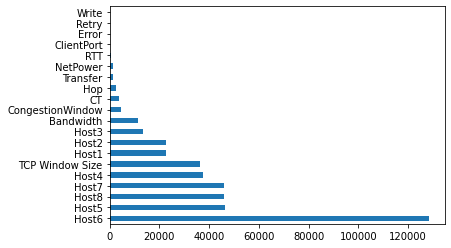

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(["Interval","Transfer","Bandwidth","Write","Error","Retry","CongestionWindow","RTT","NetPower","ServerPort","ClientPort","Window Buffer Size", "TCP Window Size","CT","Host1","Host2","Host3","Host4","Host5","Host6","Host7","Host8","Hop"])
#concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(20,'Score'))  #print 10 best features
feat_importances = pd.Series(fit.scores_, index=["Interval","Transfer","Bandwidth","Write","Error","Retry","CongestionWindow","RTT","NetPower","ServerPort","ClientPort","Window Buffer Size", "TCP Window Size","CT","Host1","Host2","Host3","Host4","Host5","Host6","Host7","Host8","Hop"])
import matplotlib.pyplot as plt
%matplotlib inline
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
train = []
Y = []
X = []
X_n = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_3.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            if(float(row[j])<0):
              continue
            r1.append(float(row[j]))
        if(len(r1)!=len(row)):
          continue
        X.append(numpy.array(r1[:len(r1)-7]))
        X_n.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    if (Yd[i][0]==0):
      Y1.append(0)
    else:
      Y1.append(1)
    
df = pd.DataFrame(X)
print(df.head())

df_train = pd.DataFrame(Yd)
print(df_train.head())

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(df,df_train)

    0         1         2         3         4   ...   18   19   20   21   22
0  1.0  0.200195  0.008599  0.000032  0.000000  ...  0.0  0.0  0.0  1.0  1.0
1  1.0  0.254883  0.011011  0.000041  0.000000  ...  1.0  1.0  0.0  0.0  1.0
2  1.0  0.000000  0.000000  0.000000  0.000205  ...  0.0  0.0  1.0  0.0  1.0
3  1.0  0.034277  0.001471  0.000006  0.000000  ...  0.0  0.0  0.0  0.0  1.0
4  1.0  0.019727  0.849850  0.000003  0.000000  ...  1.0  0.0  0.0  1.0  1.0

[5 rows x 23 columns]
     0    1    2    3    4    5    6
0  1.0  0.0  0.0  1.0  0.0  0.0  1.0
1  0.0  1.0  1.0  0.0  0.0  1.0  0.0
2  1.0  0.0  0.0  1.0  0.0  0.0  1.0
3  1.0  1.0  0.0  0.0  0.0  0.0  1.0
4  0.0  1.0  0.0  1.0  0.0  0.0  1.0


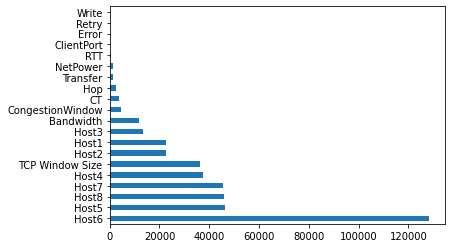

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(["Interval","Transfer","Bandwidth","Write","Error","Retry","CongestionWindow","RTT","NetPower","ServerPort","ClientPort","Window Buffer Size", "TCP Window Size","CT","Host1","Host2","Host3","Host4","Host5","Host6","Host7","Host8","Hop"])
#concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(20,'Score'))  #print 10 best features
feat_importances = pd.Series(fit.scores_, index=["Interval","Transfer","Bandwidth","Write","Error","Retry","CongestionWindow","RTT","NetPower","ServerPort","ClientPort","Window Buffer Size", "TCP Window Size","CT","Host1","Host2","Host3","Host4","Host5","Host6","Host7","Host8","Hop"])
import matplotlib.pyplot as plt
%matplotlib inline
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
train = []
Y = []
X = []
X_n = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_4.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            if(float(row[j])<0):
              continue
            r1.append(float(row[j]))
        if(len(r1)!=len(row)):
          continue
        X.append(numpy.array(r1[:len(r1)-7]))
        X_n.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    if (Yd[i][0]==0):
      Y1.append(0)
    else:
      Y1.append(1)
    
df = pd.DataFrame(X)
print(df.head())

df_train = pd.DataFrame(Yd)
print(df_train.head())

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(df,df_train)

    0         1         2         3    4    5   ...   17   18   19   20   21   22
0  1.0  0.128906  0.005556  0.000021  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0  1.0
1  1.0  0.024316  0.001041  0.000004  0.0  0.0  ...  0.0  0.0  0.0  0.0  1.0  1.0
2  1.0  0.024609  0.001061  0.000004  0.0  0.0  ...  1.0  0.0  0.0  1.0  0.0  1.0
3  1.0  0.265625  0.011411  0.000043  0.0  0.0  ...  0.0  1.0  0.0  0.0  0.0  1.0
4  1.0  0.021875  0.938939  0.000004  0.0  0.0  ...  0.0  0.0  1.0  0.0  1.0  1.0

[5 rows x 23 columns]
     0    1    2    3    4    5    6
0  1.0  0.0  0.0  1.0  0.0  0.0  1.0
1  0.0  1.0  0.0  1.0  0.0  0.0  1.0
2  0.0  1.0  0.0  1.0  0.0  0.0  1.0
3  1.0  1.0  0.0  0.0  0.0  1.0  0.0
4  0.0  0.0  1.0  1.0  0.0  0.0  1.0


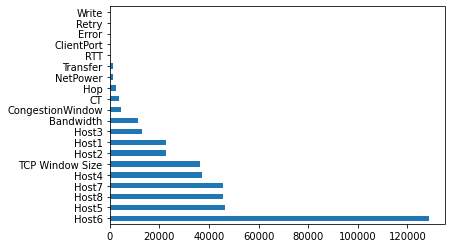

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(["Interval","Transfer","Bandwidth","Write","Error","Retry","CongestionWindow","RTT","NetPower","ServerPort","ClientPort","Window Buffer Size", "TCP Window Size","CT","Host1","Host2","Host3","Host4","Host5","Host6","Host7","Host8","Hop"])
#concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(20,'Score'))  #print 10 best features
feat_importances = pd.Series(fit.scores_, index=["Interval","Transfer","Bandwidth","Write","Error","Retry","CongestionWindow","RTT","NetPower","ServerPort","ClientPort","Window Buffer Size", "TCP Window Size","CT","Host1","Host2","Host3","Host4","Host5","Host6","Host7","Host8","Hop"])
import matplotlib.pyplot as plt
%matplotlib inline
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
num_classes =  2
num_hidden_layers = 512
input_length = 23

In [ ]:
model1 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (512,)
W shape: (23, 512)
Beta shape: (512, 2)


In [ ]:
model1.fit(df.values, Y1, display_time=True)

Train time: 25.17159605026245


In [ ]:
model2 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (512,)
W shape: (23, 512)
Beta shape: (512, 2)


In [ ]:
model2.fit(df.values, Y2, display_time=True)

Train time: 25.16202473640442


In [ ]:
model3 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (512,)
W shape: (23, 512)
Beta shape: (512, 2)


In [ ]:
model3.fit(df.values, Y3, display_time=True)

Train time: 25.131683349609375


In [ ]:
model4 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (512,)
W shape: (23, 512)
Beta shape: (512, 2)


In [ ]:
model4.fit(df.values, Y4, display_time=True)

Train time: 25.293724298477173


In [ ]:
model5 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (512,)
W shape: (23, 512)
Beta shape: (512, 2)


In [ ]:
model5.fit(df.values, Y5, display_time=True)

Train time: 25.621280431747437


In [ ]:
model6 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (512,)
W shape: (23, 512)
Beta shape: (512, 2)


In [ ]:
model6.fit(df.values, Y6, display_time=True)

Train time: 25.5664222240448


In [ ]:
model7 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (512,)
W shape: (23, 512)
Beta shape: (512, 2)


In [ ]:
model7.fit(df.values, Y7, display_time=True)

Train time: 25.46807885169983


In [ ]:
pred1 = model1(df.values)
pred2 = model2(df.values)
pred3 = model3(df.values)
pred4 = model4(df.values)
pred5 = model5(df.values)
pred6 = model6(df.values)
pred7 = model7(df.values)

preds = []

for i in range(0,len(pred1)):
  pred = []
  pred.extend(pred1[i])
  pred.extend(pred2[i])
  pred.extend(pred3[i])
  pred.extend(pred4[i])
  pred.extend(pred5[i])
  pred.extend(pred6[i])
  pred.extend(pred7[i])
  preds.append(pred)

print(preds[1])

[-0.0010423404110042611, 1.0010390302463748, 0.008012426927166416, 0.9919879474854838, 1.0045312059277904, -0.004531242755405174, 1.0052003750561909, -0.005205891631543835, 1.002209152383692, -0.0022065033890896757, 1.0021678762818738, -0.0021677242742725866, 0.013172236194758824, 0.9868282970722664]


In [ ]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

clf = MultiOutputClassifier(KNeighborsClassifier()).fit(preds, Yd)
print(clf.predict(preds[-2:]))

[[1. 1. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0. 0.]]


In [ ]:
# test
train = []
Y = []
X = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_5.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.000000,0.000000,0.000000,0.000205,0.000000,0.000145,3.120000e-06,0.000000,1.0,0.553577,1.0,0.514035,0.220328,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.054785,0.002352,0.000009,0.000000,0.000000,0.085165,1.660000e-05,0.000788,1.0,0.708059,1.0,1.000000,0.000018,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.355469,0.015315,0.000057,0.000000,0.000000,0.017785,3.900000e-07,0.218476,1.0,0.598773,1.0,0.171053,0.000004,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.073340,0.003153,0.000012,0.000000,0.000001,0.170474,3.020000e-05,0.000581,1.0,0.561284,1.0,1.000000,0.000092,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.021680,0.933934,0.000003,0.000000,0.000000,0.075333,1.350000e-05,0.000386,1.0,0.687067,1.0,1.000000,0.000021,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [ ]:
pred1 = model1(df.values)
pred2 = model2(df.values)
pred3 = model3(df.values)
pred4 = model4(df.values)
pred5 = model5(df.values)
pred6 = model6(df.values)
pred7 = model7(df.values)

preds = []

for i in range(0,len(pred1)):
  pred = []
  pred.extend(pred1[i])
  pred.extend(pred2[i])
  pred.extend(pred3[i])
  pred.extend(pred4[i])
  pred.extend(pred5[i])
  pred.extend(pred6[i])
  pred.extend(pred7[i])
  preds.append(pred)

print(preds[1])

[-0.0008198218898627374, 1.000842709230838, -0.0353790586972309, 1.0353785086947482, 1.0136074617671085, -0.013606767556225918, 0.9724514363506067, 0.027569870713527678, 0.9895473123404699, 0.010444863414797112, 1.007314099770099, -0.00731338296964168, 0.017107701886418858, 0.9829025005183136]


In [ ]:
y_pred = clf.predict(preds)

In [ ]:
y_test = pd.DataFrame(Yd)
y_test.head()

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y_pred = pd.DataFrame(y_pred)
Y_pred.head()

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

Accuracy: 0.999924
Precision: 0.999924
Recall: 0.999924
F1 score: 0.999924
Cohens kappa: 0.999831
[[ 72471     11]
 [     5 137228]]
Predicted    0.0     1.0     All
Actual                          
0.0        72471      11   72482
1.0            5  137228  137233
All        72476  137239  209715







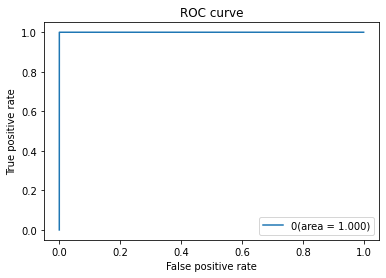

Accuracy: 0.999905
Precision: 0.999905
Recall: 0.999905
F1 score: 0.999905
Cohens kappa: 0.999809
[[103806     12]
 [     8 105889]]
Predicted     0.0     1.0     All
Actual                           
0.0        103806      12  103818
1.0             8  105889  105897
All        103814  105901  209715







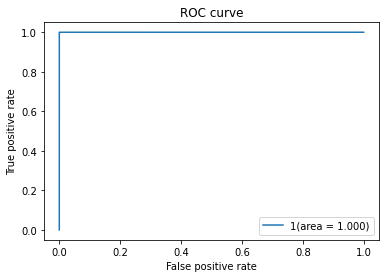

Accuracy: 0.999943
Precision: 0.999943
Recall: 0.999943
F1 score: 0.999943
Cohens kappa: 0.999842
[[159807      5]
 [     7  49896]]
Predicted     0.0    1.0     All
Actual                          
0.0        159807      5  159812
1.0             7  49896   49903
All        159814  49901  209715







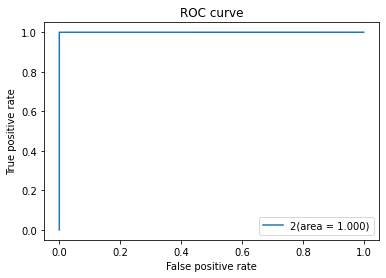

Accuracy: 0.999905
Precision: 0.999905
Recall: 0.999905
F1 score: 0.999905
Cohens kappa: 0.999804
[[121566      9]
 [    11  88129]]
Predicted     0.0    1.0     All
Actual                          
0.0        121566      9  121575
1.0            11  88129   88140
All        121577  88138  209715







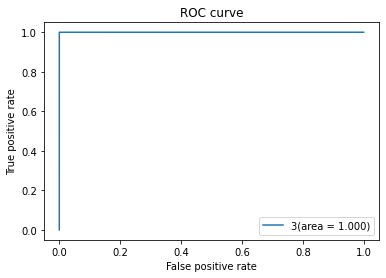

Accuracy: 0.999080
Precision: 0.999080
Recall: 0.999080
F1 score: 0.999080
Cohens kappa: 0.997219
[[165733    113]
 [    80  43789]]
Predicted     0.0    1.0     All
Actual                          
0.0        165733    113  165846
1.0            80  43789   43869
All        165813  43902  209715







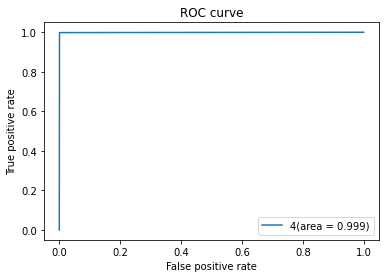

Accuracy: 0.999819
Precision: 0.999819
Recall: 0.999819
F1 score: 0.999819
Cohens kappa: 0.999303
[[177472     18]
 [    20  32205]]
Predicted     0.0    1.0     All
Actual                          
0.0        177472     18  177490
1.0            20  32205   32225
All        177492  32223  209715







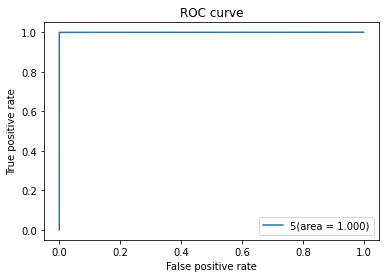

Accuracy: 0.999804
Precision: 0.999804
Recall: 0.999804
F1 score: 0.999804
Cohens kappa: 0.999606
[[113362     27]
 [    14  96312]]
Predicted     0.0    1.0     All
Actual                          
0.0        113362     27  113389
1.0            14  96312   96326
All        113376  96339  209715







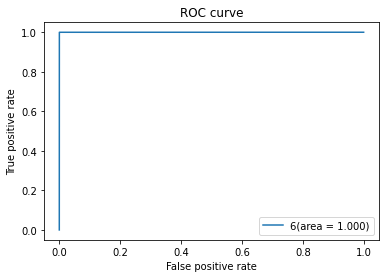

In [ ]:
%matplotlib inline

for i in range(0,7):
    
    accuracy = accuracy_score(y_test[i], Y_pred[i])
    print('Accuracy: %f' % accuracy)

    # precision tp / (tp + fp)
    precision = precision_score(y_test[i], Y_pred[i], average='micro')
    print('Precision: %f' % precision)

    # recall: tp / (tp + fn)
    recall = recall_score(y_test[i], Y_pred[i], average='micro')
    print('Recall: %f' % recall)

    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test[i], Y_pred[i], average='micro')
    print('F1 score: %f' % f1)

    # kappa
    kappa = cohen_kappa_score(y_test[i], Y_pred[i])
    print('Cohens kappa: %f' % kappa)

    # ROC AUC
    # auc = roc_auc_score(Yt_1, p_1)
    # print('ROC AUC: %f' % auc)
    
    fp, tp, thresholds_keras = roc_curve(y_test[i], Y_pred[i])
    
    auc_rf = auc(fp,tp)
    plt.plot(fp,tp,label=str(i)+"(area = {:.3f})".format(auc_rf))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')

    # confusion matrix
    matrix = confusion_matrix(y_test[i], Y_pred[i])
    print(matrix)

    exp_series = pd.Series(y_test[i])
    pred_series = pd.Series(Y_pred[i])
    print(pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print("\n\n\n\n")
    # plt.savefig('/content/drive/MyDrive/ROC'+str(j)+'.png')
    plt.show()
    

In [ ]:
train = []
Y = []
X = []
X_n = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_2.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(numpy.array(r1[:len(r1)-7]))
        X_n.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    if (Yd[i][0]==0):
      Y1.append([1,0])
    else:
      Y1.append([0,1])
    if (Yd[i][1]==0):
      Y2.append([1,0])
    else:
      Y2.append([0,1])

    if (Yd[i][2]==0):
      Y3.append([1,0])
    else:
      Y3.append([0,1])

    if (Yd[i][3]==0):
      Y4.append([1,0])
    else:
      Y4.append([0,1])
    
    if (Yd[i][4]==0):
      Y5.append([1,0])
    else:
      Y5.append([0,1])

    if (Yd[i][5]==0):
      Y6.append([1,0])
    else:
      Y6.append([0,1])

    if (Yd[i][6]==0):
      Y7.append([1,0])
    else:
      Y7.append([0,1])


In [ ]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.273438,0.011712,0.000044,0.000000,0.0,0.043956,1.320000e-06,0.049690,1.0,0.931647,1.0,0.514035,0.000001,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.5
1,1.0,0.023926,0.001031,0.000004,0.000000,0.0,0.127530,1.730000e-05,0.000332,1.0,0.562039,1.0,1.000000,0.000321,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,0.021387,0.918919,0.000003,0.000000,0.0,0.085165,1.850000e-05,0.000276,1.0,0.559349,1.0,1.000000,0.000013,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.212891,0.009149,0.000034,0.000000,0.0,0.015471,4.080000e-07,0.124784,1.0,0.598773,1.0,0.171053,0.000004,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.000000,0.000000,0.000000,0.000205,0.0,0.000145,1.438840e-04,0.000000,1.0,0.997802,1.0,0.514035,0.000825,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [ ]:
model1.fit(df.values, Y1, display_time=True)

Train time: 26.434216022491455


In [ ]:
model2.fit(df.values, Y2, display_time=True)

Train time: 25.962674379348755


In [ ]:
model3.fit(df.values, Y3, display_time=True)

Train time: 25.879841327667236


In [ ]:
model4.fit(df.values, Y4, display_time=True)

Train time: 26.02293062210083


In [ ]:
model5.fit(df.values, Y5, display_time=True)

Train time: 25.835570096969604


In [ ]:
model6.fit(df.values, Y6, display_time=True)

Train time: 25.620720386505127


In [ ]:
model7.fit(df.values, Y7, display_time=True)

Train time: 25.881094932556152


In [ ]:
pred1 = model1(df.values)
pred2 = model2(df.values)
pred3 = model3(df.values)
pred4 = model4(df.values)
pred5 = model5(df.values)
pred6 = model6(df.values)
pred7 = model7(df.values)

preds = []

for i in range(0,len(pred1)):
  pred = []
  pred.extend(pred1[i])
  pred.extend(pred2[i])
  pred.extend(pred3[i])
  pred.extend(pred4[i])
  pred.extend(pred5[i])
  pred.extend(pred6[i])
  pred.extend(pred7[i])
  preds.append(pred)

print(preds[1])

[-0.0016879865290135854, 1.0016768147532176, 0.9918289325963201, 0.008172912348925365, 1.0005046860666482, -0.0005090293569054438, 0.0032687186472983853, 0.9967282273480436, 0.9797471650817126, 0.020252684195096515, 0.9843525140042289, 0.015649276381964228, -0.012563773010924706, 1.0125643989233666]


In [ ]:

clf.fit(preds, Yd)
print(clf.predict(preds[-2:]))

[[0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 1. 0.]]


In [ ]:
# test
train = []
Y = []
X = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_5.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.000000,0.000000,0.000000,0.000205,0.000000,0.000145,3.120000e-06,0.000000,1.0,0.553577,1.0,0.514035,0.220328,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.054785,0.002352,0.000009,0.000000,0.000000,0.085165,1.660000e-05,0.000788,1.0,0.708059,1.0,1.000000,0.000018,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.355469,0.015315,0.000057,0.000000,0.000000,0.017785,3.900000e-07,0.218476,1.0,0.598773,1.0,0.171053,0.000004,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.073340,0.003153,0.000012,0.000000,0.000001,0.170474,3.020000e-05,0.000581,1.0,0.561284,1.0,1.000000,0.000092,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.021680,0.933934,0.000003,0.000000,0.000000,0.075333,1.350000e-05,0.000386,1.0,0.687067,1.0,1.000000,0.000021,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [ ]:
pred1 = model1(df.values)
pred2 = model2(df.values)
pred3 = model3(df.values)
pred4 = model4(df.values)
pred5 = model5(df.values)
pred6 = model6(df.values)
pred7 = model7(df.values)

preds = []

for i in range(0,len(pred1)):
  pred = []
  pred.extend(pred1[i])
  pred.extend(pred2[i])
  pred.extend(pred3[i])
  pred.extend(pred4[i])
  pred.extend(pred5[i])
  pred.extend(pred6[i])
  pred.extend(pred7[i])
  preds.append(pred)

print(preds[1])

[-0.004183831000112548, 1.004201038249704, -0.031254508475228704, 1.0312574402932455, 1.0179090471678336, -0.017907702435294937, 0.9548498174968767, 0.04516640703924946, 0.9860843936906747, 0.013909134546796764, 1.0017981230712394, -0.0017960559594598635, 0.04389357977198216, 0.9561160868419591]


In [ ]:
y_pred = clf.predict(preds)

In [ ]:
y_test = pd.DataFrame(Yd)
y_test.head()

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y_pred = pd.DataFrame(y_pred)
Y_pred.head()

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Accuracy: 0.999933
Precision: 0.999933
Recall: 0.999933
F1 score: 0.999933
Cohens kappa: 0.999852
[[ 72472     10]
 [     4 137229]]
Predicted    0.0     1.0     All
Actual                          
0.0        72472      10   72482
1.0            4  137229  137233
All        72476  137239  209715







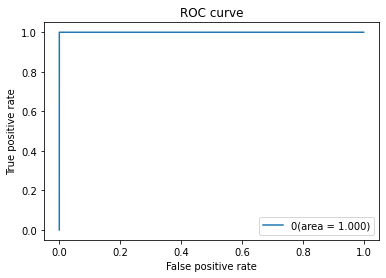

Accuracy: 0.999876
Precision: 0.999876
Recall: 0.999876
F1 score: 0.999876
Cohens kappa: 0.999752
[[103804     14]
 [    12 105885]]
Predicted     0.0     1.0     All
Actual                           
0.0        103804      14  103818
1.0            12  105885  105897
All        103816  105899  209715







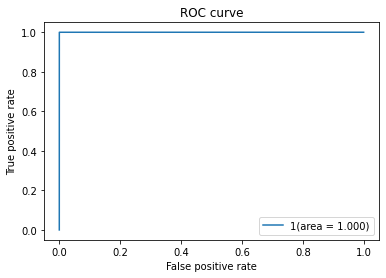

Accuracy: 0.999967
Precision: 0.999967
Recall: 0.999967
F1 score: 0.999967
Cohens kappa: 0.999908
[[159807      5]
 [     2  49901]]
Predicted     0.0    1.0     All
Actual                          
0.0        159807      5  159812
1.0             2  49901   49903
All        159809  49906  209715







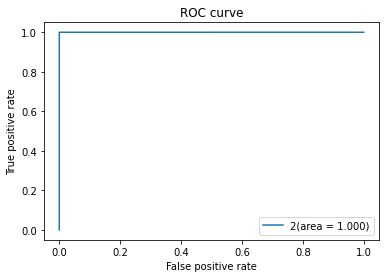

Accuracy: 0.999909
Precision: 0.999909
Recall: 0.999909
F1 score: 0.999909
Cohens kappa: 0.999814
[[121568      7]
 [    12  88128]]
Predicted     0.0    1.0     All
Actual                          
0.0        121568      7  121575
1.0            12  88128   88140
All        121580  88135  209715







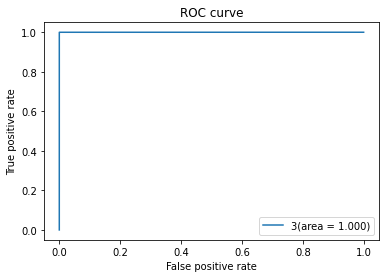

Accuracy: 0.999790
Precision: 0.999790
Recall: 0.999790
F1 score: 0.999790
Cohens kappa: 0.999366
[[165829     17]
 [    27  43842]]
Predicted     0.0    1.0     All
Actual                          
0.0        165829     17  165846
1.0            27  43842   43869
All        165856  43859  209715







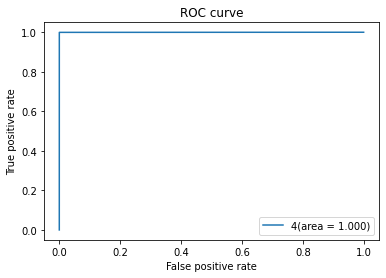

Accuracy: 0.999838
Precision: 0.999838
Recall: 0.999838
F1 score: 0.999838
Cohens kappa: 0.999377
[[177473     17]
 [    17  32208]]
Predicted     0.0    1.0     All
Actual                          
0.0        177473     17  177490
1.0            17  32208   32225
All        177490  32225  209715







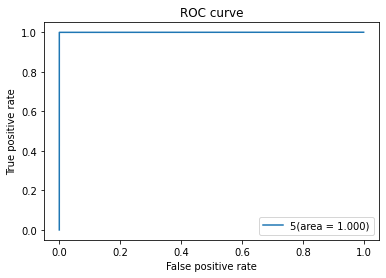

Accuracy: 0.999862
Precision: 0.999862
Recall: 0.999862
F1 score: 0.999862
Cohens kappa: 0.999722
[[113373     16]
 [    13  96313]]
Predicted     0.0    1.0     All
Actual                          
0.0        113373     16  113389
1.0            13  96313   96326
All        113386  96329  209715







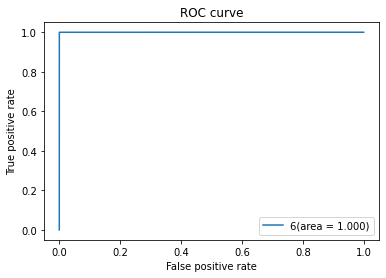

In [ ]:
%matplotlib inline

for i in range(0,7):
    
    accuracy = accuracy_score(y_test[i], Y_pred[i])
    print('Accuracy: %f' % accuracy)

    # precision tp / (tp + fp)
    precision = precision_score(y_test[i], Y_pred[i], average='micro')
    print('Precision: %f' % precision)

    # recall: tp / (tp + fn)
    recall = recall_score(y_test[i], Y_pred[i], average='micro')
    print('Recall: %f' % recall)

    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test[i], Y_pred[i], average='micro')
    print('F1 score: %f' % f1)

    # kappa
    kappa = cohen_kappa_score(y_test[i], Y_pred[i])
    print('Cohens kappa: %f' % kappa)

    # ROC AUC
    # auc = roc_auc_score(Yt_1, p_1)
    # print('ROC AUC: %f' % auc)
    
    fp, tp, thresholds_keras = roc_curve(y_test[i], Y_pred[i])
    
    auc_rf = auc(fp,tp)
    plt.plot(fp,tp,label=str(i)+"(area = {:.3f})".format(auc_rf))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')

    # confusion matrix
    matrix = confusion_matrix(y_test[i], Y_pred[i])
    print(matrix)

    exp_series = pd.Series(y_test[i])
    pred_series = pd.Series(Y_pred[i])
    print(pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print("\n\n\n\n")
    # plt.savefig('/content/drive/MyDrive/ROC'+str(j)+'.png')
    plt.show()
    

In [ ]:
train = []
Y = []
X = []
X_n = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_3.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(numpy.array(r1[:len(r1)-7]))
        X_n.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    if (Yd[i][0]==0):
      Y1.append([1,0])
    else:
      Y1.append([0,1])
    if (Yd[i][1]==0):
      Y2.append([1,0])
    else:
      Y2.append([0,1])

    if (Yd[i][2]==0):
      Y3.append([1,0])
    else:
      Y3.append([0,1])

    if (Yd[i][3]==0):
      Y4.append([1,0])
    else:
      Y4.append([0,1])
    
    if (Yd[i][4]==0):
      Y5.append([1,0])
    else:
      Y5.append([0,1])

    if (Yd[i][5]==0):
      Y6.append([1,0])
    else:
      Y6.append([0,1])

    if (Yd[i][6]==0):
      Y7.append([1,0])
    else:
      Y7.append([0,1])


In [ ]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.200195,0.008599,0.000032,0.000000,0.0,0.175101,0.000011,0.004448,1.0,0.583620,1.0,1.000000,0.000189,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.254883,0.011011,0.000041,0.000000,0.0,0.050607,0.000001,0.049131,1.0,0.625570,1.0,0.514035,0.001222,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1.0,0.000000,0.000000,0.000000,0.000205,0.0,0.043667,0.126413,0.000000,1.0,0.699761,1.0,0.514035,0.002461,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.034277,0.001471,0.000006,0.000000,0.0,0.085165,0.000006,0.001419,1.0,0.559349,1.0,1.000000,0.000013,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.019727,0.849850,0.000003,0.000000,0.0,0.085165,0.000023,0.000206,1.0,0.858113,1.0,1.000000,0.000876,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [ ]:
model1.fit(df.values, Y1, display_time=True)

Train time: 26.16984486579895


In [ ]:
model2.fit(df.values, Y2, display_time=True)

Train time: 25.70010256767273


In [ ]:
model3.fit(df.values, Y3, display_time=True)

Train time: 25.72561025619507


In [ ]:
model4.fit(df.values, Y4, display_time=True)

Train time: 25.84158992767334


In [ ]:
model5.fit(df.values, Y5, display_time=True)

Train time: 25.78651475906372


In [ ]:
model6.fit(df.values, Y6, display_time=True)

Train time: 25.74671173095703


In [ ]:
model7.fit(df.values, Y7, display_time=True)

Train time: 25.68942928314209


In [ ]:
pred1 = model1(df.values)
pred2 = model2(df.values)
pred3 = model3(df.values)
pred4 = model4(df.values)
pred5 = model5(df.values)
pred6 = model6(df.values)
pred7 = model7(df.values)

preds = []

for i in range(0,len(pred1)):
  pred = []
  pred.extend(pred1[i])
  pred.extend(pred2[i])
  pred.extend(pred3[i])
  pred.extend(pred4[i])
  pred.extend(pred5[i])
  pred.extend(pred6[i])
  pred.extend(pred7[i])
  preds.append(pred)

print(preds[1])

[1.0141291052227928, -0.014119286388933006, 0.03265761984997084, 0.9673334188624096, -0.0014814946395489414, 1.001486147470331, 0.9858622544540907, 0.014138277676039479, 1.001667701896281, -0.0016658892727434704, -0.027823147423134742, 1.0278175960959288, 0.9772911990256432, 0.022701397401121426]


In [ ]:

clf.fit(preds, Yd)
print(clf.predict(preds[-2:]))

[[0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1.]]


In [ ]:
# test
train = []
Y = []
X = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_5.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.000000,0.000000,0.000000,0.000205,0.000000,0.000145,3.120000e-06,0.000000,1.0,0.553577,1.0,0.514035,0.220328,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.054785,0.002352,0.000009,0.000000,0.000000,0.085165,1.660000e-05,0.000788,1.0,0.708059,1.0,1.000000,0.000018,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.355469,0.015315,0.000057,0.000000,0.000000,0.017785,3.900000e-07,0.218476,1.0,0.598773,1.0,0.171053,0.000004,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.073340,0.003153,0.000012,0.000000,0.000001,0.170474,3.020000e-05,0.000581,1.0,0.561284,1.0,1.000000,0.000092,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.021680,0.933934,0.000003,0.000000,0.000000,0.075333,1.350000e-05,0.000386,1.0,0.687067,1.0,1.000000,0.000021,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [ ]:
pred1 = model1(df.values)
pred2 = model2(df.values)
pred3 = model3(df.values)
pred4 = model4(df.values)
pred5 = model5(df.values)
pred6 = model6(df.values)
pred7 = model7(df.values)

preds = []

for i in range(0,len(pred1)):
  pred = []
  pred.extend(pred1[i])
  pred.extend(pred2[i])
  pred.extend(pred3[i])
  pred.extend(pred4[i])
  pred.extend(pred5[i])
  pred.extend(pred6[i])
  pred.extend(pred7[i])
  preds.append(pred)

print(preds[1])

[-0.006541290956981527, 1.0065677656814174, -0.012599001642286112, 1.0126095839911784, 1.0154808879857598, -0.015476880559390338, 0.9600641353761432, 0.03995557372192593, 0.9986708530858124, 0.0013201599252141705, 1.0017967343935652, -0.0017947637611541722, 0.03019711453711693, 0.9698138550673789]


In [ ]:
y_pred = clf.predict(preds)

In [ ]:
y_test = pd.DataFrame(Yd)
y_test.head()

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y_pred = pd.DataFrame(y_pred)
Y_pred.head()

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Accuracy: 0.999928
Precision: 0.999928
Recall: 0.999928
F1 score: 0.999928
Cohens kappa: 0.999842
[[ 72471     11]
 [     4 137229]]
Predicted    0.0     1.0     All
Actual                          
0.0        72471      11   72482
1.0            4  137229  137233
All        72475  137240  209715







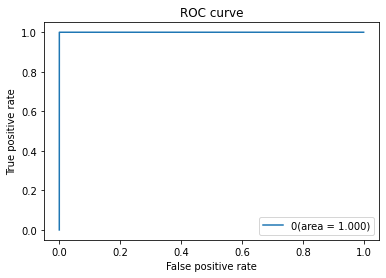

Accuracy: 0.999890
Precision: 0.999890
Recall: 0.999890
F1 score: 0.999890
Cohens kappa: 0.999781
[[103808     10]
 [    13 105884]]
Predicted     0.0     1.0     All
Actual                           
0.0        103808      10  103818
1.0            13  105884  105897
All        103821  105894  209715







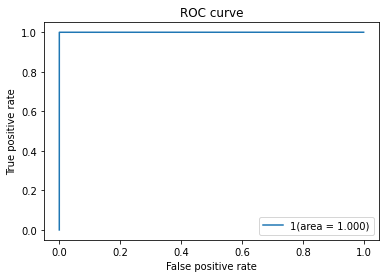

Accuracy: 0.999914
Precision: 0.999914
Recall: 0.999914
F1 score: 0.999914
Cohens kappa: 0.999763
[[159802     10]
 [     8  49895]]
Predicted     0.0    1.0     All
Actual                          
0.0        159802     10  159812
1.0             8  49895   49903
All        159810  49905  209715







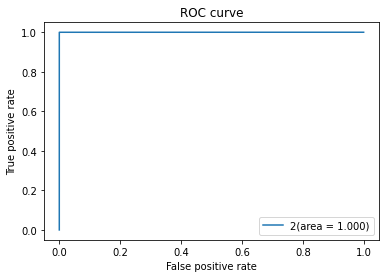

Accuracy: 0.999890
Precision: 0.999890
Recall: 0.999890
F1 score: 0.999890
Cohens kappa: 0.999775
[[121565     10]
 [    13  88127]]
Predicted     0.0    1.0     All
Actual                          
0.0        121565     10  121575
1.0            13  88127   88140
All        121578  88137  209715







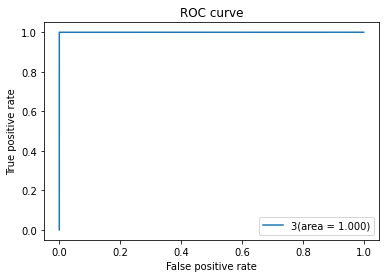

Accuracy: 0.999824
Precision: 0.999824
Recall: 0.999824
F1 score: 0.999824
Cohens kappa: 0.999467
[[165828     18]
 [    19  43850]]
Predicted     0.0    1.0     All
Actual                          
0.0        165828     18  165846
1.0            19  43850   43869
All        165847  43868  209715







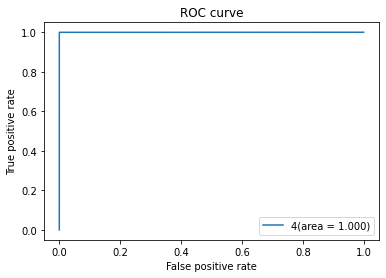

Accuracy: 0.999819
Precision: 0.999819
Recall: 0.999819
F1 score: 0.999819
Cohens kappa: 0.999303
[[177472     18]
 [    20  32205]]
Predicted     0.0    1.0     All
Actual                          
0.0        177472     18  177490
1.0            20  32205   32225
All        177492  32223  209715







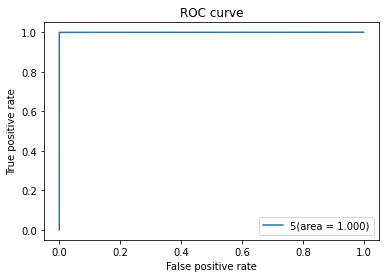

Accuracy: 0.999857
Precision: 0.999857
Recall: 0.999857
F1 score: 0.999857
Cohens kappa: 0.999712
[[113372     17]
 [    13  96313]]
Predicted     0.0    1.0     All
Actual                          
0.0        113372     17  113389
1.0            13  96313   96326
All        113385  96330  209715







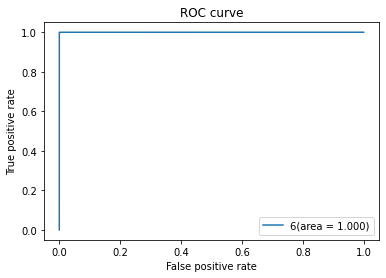

In [ ]:
%matplotlib inline

for i in range(0,7):
    
    accuracy = accuracy_score(y_test[i], Y_pred[i])
    print('Accuracy: %f' % accuracy)

    # precision tp / (tp + fp)
    precision = precision_score(y_test[i], Y_pred[i], average='micro')
    print('Precision: %f' % precision)

    # recall: tp / (tp + fn)
    recall = recall_score(y_test[i], Y_pred[i], average='micro')
    print('Recall: %f' % recall)

    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test[i], Y_pred[i], average='micro')
    print('F1 score: %f' % f1)

    # kappa
    kappa = cohen_kappa_score(y_test[i], Y_pred[i])
    print('Cohens kappa: %f' % kappa)

    # ROC AUC
    # auc = roc_auc_score(Yt_1, p_1)
    # print('ROC AUC: %f' % auc)
    
    fp, tp, thresholds_keras = roc_curve(y_test[i], Y_pred[i])
    
    auc_rf = auc(fp,tp)
    plt.plot(fp,tp,label=str(i)+"(area = {:.3f})".format(auc_rf))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')

    # confusion matrix
    matrix = confusion_matrix(y_test[i], Y_pred[i])
    print(matrix)

    exp_series = pd.Series(y_test[i])
    pred_series = pd.Series(Y_pred[i])
    print(pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print("\n\n\n\n")
    # plt.savefig('/content/drive/MyDrive/ROC'+str(j)+'.png')
    plt.show()
    

In [ ]:
train = []
Y = []
X = []
X_n = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_4.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(numpy.array(r1[:len(r1)-7]))
        X_n.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    if (Yd[i][0]==0):
      Y1.append([1,0])
    else:
      Y1.append([0,1])
    if (Yd[i][1]==0):
      Y2.append([1,0])
    else:
      Y2.append([0,1])

    if (Yd[i][2]==0):
      Y3.append([1,0])
    else:
      Y3.append([0,1])

    if (Yd[i][3]==0):
      Y4.append([1,0])
    else:
      Y4.append([0,1])
    
    if (Yd[i][4]==0):
      Y5.append([1,0])
    else:
      Y5.append([0,1])

    if (Yd[i][5]==0):
      Y6.append([1,0])
    else:
      Y6.append([0,1])

    if (Yd[i][6]==0):
      Y7.append([1,0])
    else:
      Y7.append([0,1])


In [ ]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.128906,0.005556,0.000021,0.0,0.0,0.044968,4.800000e-06,0.006440,1.0,0.701105,1.0,0.514035,0.000479,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.024316,0.001041,0.000004,0.0,0.0,0.085165,1.290000e-05,0.000450,1.0,0.971432,1.0,1.000000,0.000204,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,0.024609,0.001061,0.000004,0.0,0.0,0.085165,1.570000e-05,0.000375,1.0,0.745416,1.0,1.000000,0.000163,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.265625,0.011411,0.000043,0.0,0.0,0.016050,4.080000e-07,0.155783,1.0,0.879170,1.0,0.171053,0.000011,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.021875,0.938939,0.000004,0.0,0.0,0.085165,1.670000e-05,0.000314,1.0,0.604907,1.0,1.000000,0.000019,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [ ]:
model1.fit(df.values, Y1, display_time=True)

Train time: 26.03106713294983


In [ ]:
model2.fit(df.values, Y2, display_time=True)

Train time: 25.739317655563354


In [ ]:
model3.fit(df.values, Y3, display_time=True)

Train time: 25.702794313430786


In [ ]:
model4.fit(df.values, Y4, display_time=True)

Train time: 25.738901376724243


In [ ]:
model5.fit(df.values, Y5, display_time=True)

Train time: 25.75734043121338


In [ ]:
model6.fit(df.values, Y6, display_time=True)

Train time: 25.661478757858276


In [ ]:
model7.fit(df.values, Y7, display_time=True)

Train time: 25.50613307952881


In [ ]:
pred1 = model1(df.values)
pred2 = model2(df.values)
pred3 = model3(df.values)
pred4 = model4(df.values)
pred5 = model5(df.values)
pred6 = model6(df.values)
pred7 = model7(df.values)

preds = []

for i in range(0,len(pred1)):
  pred = []
  pred.extend(pred1[i])
  pred.extend(pred2[i])
  pred.extend(pred3[i])
  pred.extend(pred4[i])
  pred.extend(pred5[i])
  pred.extend(pred6[i])
  pred.extend(pred7[i])
  preds.append(pred)

print(preds[1])

[0.986621245421432, 0.013382691125769952, 0.013210396776401012, 0.9867875951537144, 0.9975586096015832, 0.0024393169285019667, 0.004281259570319662, 0.9957180548690445, 0.9910008843964278, 0.009003933610060244, 1.0078024419979386, -0.007804157979649062, 0.002798373980596125, 0.9972022036077135]


In [ ]:

clf.fit(preds, Yd)
print(clf.predict(preds[-2:]))

[[1. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 1. 0. 0.]]


In [ ]:
# test
train = []
Y = []
X = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_5.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.000000,0.000000,0.000000,0.000205,0.000000,0.000145,3.120000e-06,0.000000,1.0,0.553577,1.0,0.514035,0.220328,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.054785,0.002352,0.000009,0.000000,0.000000,0.085165,1.660000e-05,0.000788,1.0,0.708059,1.0,1.000000,0.000018,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.355469,0.015315,0.000057,0.000000,0.000000,0.017785,3.900000e-07,0.218476,1.0,0.598773,1.0,0.171053,0.000004,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.073340,0.003153,0.000012,0.000000,0.000001,0.170474,3.020000e-05,0.000581,1.0,0.561284,1.0,1.000000,0.000092,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.021680,0.933934,0.000003,0.000000,0.000000,0.075333,1.350000e-05,0.000386,1.0,0.687067,1.0,1.000000,0.000021,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [ ]:
pred1 = model1(df.values)
pred2 = model2(df.values)
pred3 = model3(df.values)
pred4 = model4(df.values)
pred5 = model5(df.values)
pred6 = model6(df.values)
pred7 = model7(df.values)

preds = []

for i in range(0,len(pred1)):
  pred = []
  pred.extend(pred1[i])
  pred.extend(pred2[i])
  pred.extend(pred3[i])
  pred.extend(pred4[i])
  pred.extend(pred5[i])
  pred.extend(pred6[i])
  pred.extend(pred7[i])
  preds.append(pred)

print(preds[1])

[-0.001953867838693668, 1.0019772915537501, -0.019558156975051588, 1.019567343050369, 1.016794857051849, -0.016790373744441922, 0.960005255307081, 0.040014363307676604, 0.9866522485816915, 0.01334350072180257, 1.0036065492367925, -0.003601442542276345, 0.01698816888584531, 0.9830246715982582]


In [ ]:
y_pred = clf.predict(preds)

In [ ]:
y_test = pd.DataFrame(Yd)
y_test.head()

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y_pred = pd.DataFrame(y_pred)
Y_pred.head()

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Accuracy: 0.999928
Precision: 0.999928
Recall: 0.999928
F1 score: 0.999928
Cohens kappa: 0.999842
[[ 72475      7]
 [     8 137225]]
Predicted    0.0     1.0     All
Actual                          
0.0        72475       7   72482
1.0            8  137225  137233
All        72483  137232  209715







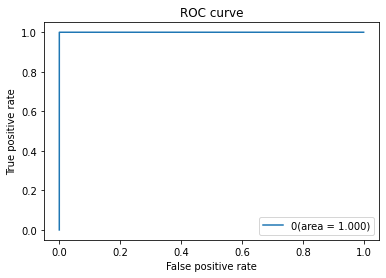

Accuracy: 0.999919
Precision: 0.999919
Recall: 0.999919
F1 score: 0.999919
Cohens kappa: 0.999838
[[103810      8]
 [     9 105888]]
Predicted     0.0     1.0     All
Actual                           
0.0        103810       8  103818
1.0             9  105888  105897
All        103819  105896  209715







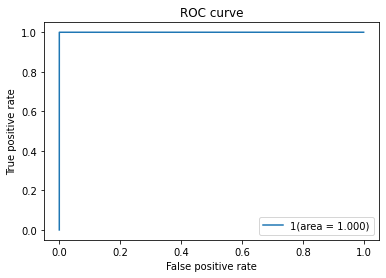

Accuracy: 0.999981
Precision: 0.999981
Recall: 0.999981
F1 score: 0.999981
Cohens kappa: 0.999947
[[159811      1]
 [     3  49900]]
Predicted     0.0    1.0     All
Actual                          
0.0        159811      1  159812
1.0             3  49900   49903
All        159814  49901  209715







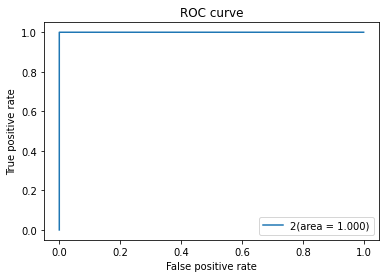

Accuracy: 0.999933
Precision: 0.999933
Recall: 0.999933
F1 score: 0.999933
Cohens kappa: 0.999863
[[121568      7]
 [     7  88133]]
Predicted     0.0    1.0     All
Actual                          
0.0        121568      7  121575
1.0             7  88133   88140
All        121575  88140  209715







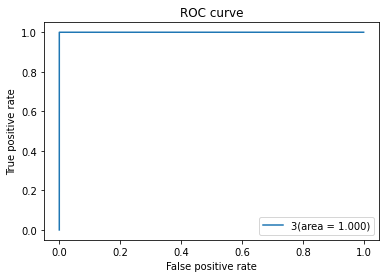

Accuracy: 0.999762
Precision: 0.999762
Recall: 0.999762
F1 score: 0.999762
Cohens kappa: 0.999279
[[165824     22]
 [    28  43841]]
Predicted     0.0    1.0     All
Actual                          
0.0        165824     22  165846
1.0            28  43841   43869
All        165852  43863  209715







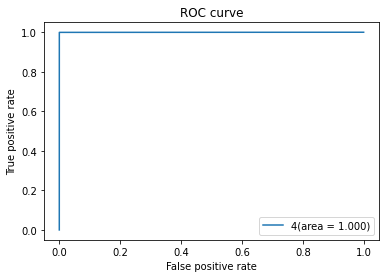

Accuracy: 0.999847
Precision: 0.999847
Recall: 0.999847
F1 score: 0.999847
Cohens kappa: 0.999413
[[177477     13]
 [    19  32206]]
Predicted     0.0    1.0     All
Actual                          
0.0        177477     13  177490
1.0            19  32206   32225
All        177496  32219  209715







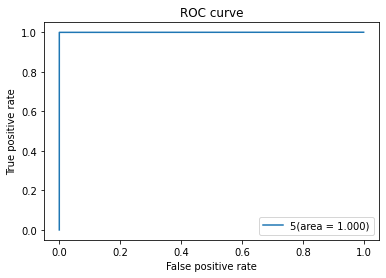

Accuracy: 0.999857
Precision: 0.999857
Recall: 0.999857
F1 score: 0.999857
Cohens kappa: 0.999712
[[113374     15]
 [    15  96311]]
Predicted     0.0    1.0     All
Actual                          
0.0        113374     15  113389
1.0            15  96311   96326
All        113389  96326  209715







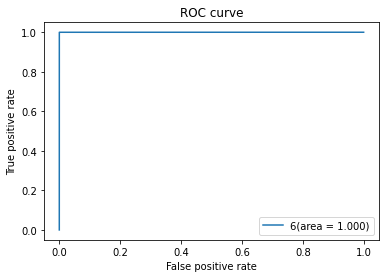

In [ ]:
%matplotlib inline

for i in range(0,7):
    
    accuracy = accuracy_score(y_test[i], Y_pred[i])
    print('Accuracy: %f' % accuracy)

    # precision tp / (tp + fp)
    precision = precision_score(y_test[i], Y_pred[i], average='micro')
    print('Precision: %f' % precision)

    # recall: tp / (tp + fn)
    recall = recall_score(y_test[i], Y_pred[i], average='micro')
    print('Recall: %f' % recall)

    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test[i], Y_pred[i], average='micro')
    print('F1 score: %f' % f1)

    # kappa
    kappa = cohen_kappa_score(y_test[i], Y_pred[i])
    print('Cohens kappa: %f' % kappa)

    # ROC AUC
    # auc = roc_auc_score(Yt_1, p_1)
    # print('ROC AUC: %f' % auc)
    
    fp, tp, thresholds_keras = roc_curve(y_test[i], Y_pred[i])
    
    auc_rf = auc(fp,tp)
    plt.plot(fp,tp,label=str(i)+"(area = {:.3f})".format(auc_rf))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')

    # confusion matrix
    matrix = confusion_matrix(y_test[i], Y_pred[i])
    print(matrix)

    exp_series = pd.Series(y_test[i])
    pred_series = pd.Series(Y_pred[i])
    print(pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print("\n\n\n\n")
    # plt.savefig('/content/drive/MyDrive/ROC'+str(j)+'.png')
    plt.show()
    

In [ ]:
import numpy as np
import sklearn

y_true_new = y_test.to_numpy()
y_pred_new = Y_pred.to_numpy()

cm = sklearn.metrics.multilabel_confusion_matrix(y_true_new, y_pred_new)
print(cm)
print( sklearn.metrics.classification_report(y_true_new,y_pred_new))

[[[ 72475      7]
  [     8 137225]]

 [[103810      8]
  [     9 105888]]

 [[159811      1]
  [     3  49900]]

 [[121568      7]
  [     7  88133]]

 [[165824     22]
  [    28  43841]]

 [[177477     13]
  [    19  32206]]

 [[113374     15]
  [    15  96311]]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    137233
           1       1.00      1.00      1.00    105897
           2       1.00      1.00      1.00     49903
           3       1.00      1.00      1.00     88140
           4       1.00      1.00      1.00     43869
           5       1.00      1.00      1.00     32225
           6       1.00      1.00      1.00     96326

   micro avg       1.00      1.00      1.00    553593
   macro avg       1.00      1.00      1.00    553593
weighted avg       1.00      1.00      1.00    553593
 samples avg       1.00      1.00      1.00    553593



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Evaluation

In [ ]:
num_classes =  2
num_hidden_layers = 32
input_length = 23

In [ ]:
model1 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (32,)
W shape: (23, 32)
Beta shape: (32, 2)


In [ ]:
model1.fit(df.values, Y1, display_time=True)

Train time: 0.6526992321014404


In [ ]:
model2 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (32,)
W shape: (23, 32)
Beta shape: (32, 2)


In [ ]:
model2.fit(df.values, Y2, display_time=True)

Train time: 0.6429402828216553


In [ ]:
model3 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (32,)
W shape: (23, 32)
Beta shape: (32, 2)


In [ ]:
model3.fit(df.values, Y3, display_time=True)

Train time: 0.625058650970459


In [ ]:
model4 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (32,)
W shape: (23, 32)
Beta shape: (32, 2)


In [ ]:
model4.fit(df.values, Y4, display_time=True)

Train time: 0.6239500045776367


In [ ]:
model5 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (32,)
W shape: (23, 32)
Beta shape: (32, 2)


In [ ]:
model5.fit(df.values, Y5, display_time=True)

Train time: 0.59663987159729


In [ ]:
model6 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (32,)
W shape: (23, 32)
Beta shape: (32, 2)


In [ ]:
model6.fit(df.values, Y6, display_time=True)

Train time: 0.652169942855835


In [ ]:
model7 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (32,)
W shape: (23, 32)
Beta shape: (32, 2)


In [ ]:
model7.fit(df.values, Y7, display_time=True)

Train time: 0.6190497875213623


In [ ]:
# test
train = []
Y = []
X = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_5.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    if (Yd[i][0]==0):
      Y1.append([1,0])
    else:
      Y1.append([0,1])
    if (Yd[i][1]==0):
      Y2.append([1,0])
    else:
      Y2.append([0,1])

    if (Yd[i][2]==0):
      Y3.append([1,0])
    else:
      Y3.append([0,1])

    if (Yd[i][3]==0):
      Y4.append([1,0])
    else:
      Y4.append([0,1])
    
    if (Yd[i][4]==0):
      Y5.append([1,0])
    else:
      Y5.append([0,1])

    if (Yd[i][5]==0):
      Y6.append([1,0])
    else:
      Y6.append([0,1])

    if (Yd[i][6]==0):
      Y7.append([1,0])
    else:
      Y7.append([0,1])


In [ ]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.000000,0.000000,0.000000,0.000205,0.000000,0.000145,3.120000e-06,0.000000,1.0,0.553577,1.0,0.514035,0.220328,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.054785,0.002352,0.000009,0.000000,0.000000,0.085165,1.660000e-05,0.000788,1.0,0.708059,1.0,1.000000,0.000018,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.355469,0.015315,0.000057,0.000000,0.000000,0.017785,3.900000e-07,0.218476,1.0,0.598773,1.0,0.171053,0.000004,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.073340,0.003153,0.000012,0.000000,0.000001,0.170474,3.020000e-05,0.000581,1.0,0.561284,1.0,1.000000,0.000092,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.021680,0.933934,0.000003,0.000000,0.000000,0.075333,1.350000e-05,0.000386,1.0,0.687067,1.0,1.000000,0.000021,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [ ]:
val_loss, val_acc = model1.evaluate(df.values, Y1)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.010922
val acc: 0.978676


In [ ]:
val_loss, val_acc = model2.evaluate(df.values, Y2)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.015423
val acc: 0.969158


In [ ]:
val_loss, val_acc = model3.evaluate(df.values, Y3)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.003999
val acc: 0.990649


In [ ]:
val_loss, val_acc = model4.evaluate(df.values, Y4)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.011399
val acc: 0.985819


In [ ]:
val_loss, val_acc = model5.evaluate(df.values, Y5)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.030851
val acc: 0.971404


In [ ]:
val_loss, val_acc = model6.evaluate(df.values, Y6)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.047814
val acc: 0.883380


In [ ]:
val_loss, val_acc = model7.evaluate(df.values, Y7)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.032740
val acc: 0.942846


In [ ]:
train = []
Y = []
X = []
X_n = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_1.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(numpy.array(r1[:len(r1)-7]))
        X_n.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    if (Yd[i][0]==0):
      Y1.append([1,0])
    else:
      Y1.append([0,1])
    if (Yd[i][1]==0):
      Y2.append([1,0])
    else:
      Y2.append([0,1])

    if (Yd[i][2]==0):
      Y3.append([1,0])
    else:
      Y3.append([0,1])

    if (Yd[i][3]==0):
      Y4.append([1,0])
    else:
      Y4.append([0,1])
    
    if (Yd[i][4]==0):
      Y5.append([1,0])
    else:
      Y5.append([0,1])

    if (Yd[i][5]==0):
      Y6.append([1,0])
    else:
      Y6.append([0,1])

    if (Yd[i][6]==0):
      Y7.append([1,0])
    else:
      Y7.append([0,1])


In [ ]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.116211,0.004995,0.000019,0.0,0.0,0.003615,6.310000e-07,0.044054,1.0,0.964577,1.0,0.042807,0.000732,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.024805,0.001061,0.000004,0.0,0.0,0.085165,1.490000e-05,0.000397,1.0,0.939191,1.0,1.000000,0.000319,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.044434,0.001912,0.000007,0.0,0.0,0.085165,9.030000e-06,0.001177,1.0,0.971432,1.0,1.000000,0.000204,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.019434,0.834835,0.000003,0.0,0.0,0.085165,1.500000e-05,0.000310,1.0,0.572206,1.0,1.000000,0.000377,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.028223,0.001211,0.000005,0.0,0.0,0.085020,1.450000e-05,0.000466,1.0,0.687067,1.0,1.000000,0.000021,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [ ]:
num_classes =  2
num_hidden_layers = 64
input_length = 23

In [ ]:
model1 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (64,)
W shape: (23, 64)
Beta shape: (64, 2)


In [ ]:
model1.fit(df.values, Y1, display_time=True)

Train time: 1.9320156574249268


In [ ]:
model2 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (64,)
W shape: (23, 64)
Beta shape: (64, 2)


In [ ]:
model2.fit(df.values, Y2, display_time=True)

Train time: 1.934211254119873


In [ ]:
model3 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (64,)
W shape: (23, 64)
Beta shape: (64, 2)


In [ ]:
model3.fit(df.values, Y3, display_time=True)

Train time: 1.941824197769165


In [ ]:
model4 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (64,)
W shape: (23, 64)
Beta shape: (64, 2)


In [ ]:
model4.fit(df.values, Y4, display_time=True)

Train time: 1.9225752353668213


In [ ]:
model5 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (64,)
W shape: (23, 64)
Beta shape: (64, 2)


In [ ]:
model5.fit(df.values, Y5, display_time=True)

Train time: 1.9361019134521484


In [ ]:
model6 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (64,)
W shape: (23, 64)
Beta shape: (64, 2)


In [ ]:
model6.fit(df.values, Y6, display_time=True)

Train time: 1.9406218528747559


In [ ]:
model7 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (64,)
W shape: (23, 64)
Beta shape: (64, 2)


In [ ]:
model7.fit(df.values, Y7, display_time=True)

Train time: 1.9533774852752686


In [ ]:
# test
train = []
Y = []
X = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_5.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    if (Yd[i][0]==0):
      Y1.append([1,0])
    else:
      Y1.append([0,1])
    if (Yd[i][1]==0):
      Y2.append([1,0])
    else:
      Y2.append([0,1])

    if (Yd[i][2]==0):
      Y3.append([1,0])
    else:
      Y3.append([0,1])

    if (Yd[i][3]==0):
      Y4.append([1,0])
    else:
      Y4.append([0,1])
    
    if (Yd[i][4]==0):
      Y5.append([1,0])
    else:
      Y5.append([0,1])

    if (Yd[i][5]==0):
      Y6.append([1,0])
    else:
      Y6.append([0,1])

    if (Yd[i][6]==0):
      Y7.append([1,0])
    else:
      Y7.append([0,1])


In [ ]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.000000,0.000000,0.000000,0.000205,0.000000,0.000145,3.120000e-06,0.000000,1.0,0.553577,1.0,0.514035,0.220328,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.054785,0.002352,0.000009,0.000000,0.000000,0.085165,1.660000e-05,0.000788,1.0,0.708059,1.0,1.000000,0.000018,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.355469,0.015315,0.000057,0.000000,0.000000,0.017785,3.900000e-07,0.218476,1.0,0.598773,1.0,0.171053,0.000004,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.073340,0.003153,0.000012,0.000000,0.000001,0.170474,3.020000e-05,0.000581,1.0,0.561284,1.0,1.000000,0.000092,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.021680,0.933934,0.000003,0.000000,0.000000,0.075333,1.350000e-05,0.000386,1.0,0.687067,1.0,1.000000,0.000021,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [ ]:
val_loss, val_acc = model1.evaluate(df.values, Y1)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.008640
val acc: 0.981942


In [ ]:
val_loss, val_acc = model2.evaluate(df.values, Y2)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.012141
val acc: 0.971428


In [ ]:
val_loss, val_acc = model3.evaluate(df.values, Y3)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.003448
val acc: 0.990644


In [ ]:
val_loss, val_acc = model4.evaluate(df.values, Y4)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.006785
val acc: 0.985795


In [ ]:
val_loss, val_acc = model5.evaluate(df.values, Y5)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.018502
val acc: 0.988961


In [ ]:
val_loss, val_acc = model6.evaluate(df.values, Y6)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.037477
val acc: 0.914832


In [ ]:
val_loss, val_acc = model7.evaluate(df.values, Y7)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.024285
val acc: 0.973721


In [ ]:
train = []
Y = []
X = []
X_n = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_1.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(numpy.array(r1[:len(r1)-7]))
        X_n.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    if (Yd[i][0]==0):
      Y1.append([1,0])
    else:
      Y1.append([0,1])
    if (Yd[i][1]==0):
      Y2.append([1,0])
    else:
      Y2.append([0,1])

    if (Yd[i][2]==0):
      Y3.append([1,0])
    else:
      Y3.append([0,1])

    if (Yd[i][3]==0):
      Y4.append([1,0])
    else:
      Y4.append([0,1])
    
    if (Yd[i][4]==0):
      Y5.append([1,0])
    else:
      Y5.append([0,1])

    if (Yd[i][5]==0):
      Y6.append([1,0])
    else:
      Y6.append([0,1])

    if (Yd[i][6]==0):
      Y7.append([1,0])
    else:
      Y7.append([0,1])


In [ ]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.116211,0.004995,0.000019,0.0,0.0,0.003615,6.310000e-07,0.044054,1.0,0.964577,1.0,0.042807,0.000732,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.024805,0.001061,0.000004,0.0,0.0,0.085165,1.490000e-05,0.000397,1.0,0.939191,1.0,1.000000,0.000319,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.044434,0.001912,0.000007,0.0,0.0,0.085165,9.030000e-06,0.001177,1.0,0.971432,1.0,1.000000,0.000204,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.019434,0.834835,0.000003,0.0,0.0,0.085165,1.500000e-05,0.000310,1.0,0.572206,1.0,1.000000,0.000377,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.028223,0.001211,0.000005,0.0,0.0,0.085020,1.450000e-05,0.000466,1.0,0.687067,1.0,1.000000,0.000021,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [ ]:
num_classes =  2
num_hidden_layers = 128
input_length = 23

In [ ]:
model1 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (128,)
W shape: (23, 128)
Beta shape: (128, 2)


In [ ]:
model1.fit(df.values, Y1, display_time=True)

Train time: 6.588413953781128


In [ ]:
model2 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (128,)
W shape: (23, 128)
Beta shape: (128, 2)


In [ ]:
model2.fit(df.values, Y2, display_time=True)

Train time: 6.538497686386108


In [ ]:
model3 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (128,)
W shape: (23, 128)
Beta shape: (128, 2)


In [ ]:
model3.fit(df.values, Y3, display_time=True)

Train time: 6.5437798500061035


In [ ]:
model4 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (128,)
W shape: (23, 128)
Beta shape: (128, 2)


In [ ]:
model4.fit(df.values, Y4, display_time=True)

Train time: 6.524303674697876


In [ ]:
model5 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (128,)
W shape: (23, 128)
Beta shape: (128, 2)


In [ ]:
model5.fit(df.values, Y5, display_time=True)

Train time: 6.49678111076355


In [ ]:
model6 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (128,)
W shape: (23, 128)
Beta shape: (128, 2)


In [ ]:
model6.fit(df.values, Y6, display_time=True)

Train time: 6.522397994995117


In [ ]:
model7 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (128,)
W shape: (23, 128)
Beta shape: (128, 2)


In [ ]:
model7.fit(df.values, Y7, display_time=True)

Train time: 6.515793085098267


In [ ]:
# test
train = []
Y = []
X = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_5.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    if (Yd[i][0]==0):
      Y1.append([1,0])
    else:
      Y1.append([0,1])
    if (Yd[i][1]==0):
      Y2.append([1,0])
    else:
      Y2.append([0,1])

    if (Yd[i][2]==0):
      Y3.append([1,0])
    else:
      Y3.append([0,1])

    if (Yd[i][3]==0):
      Y4.append([1,0])
    else:
      Y4.append([0,1])
    
    if (Yd[i][4]==0):
      Y5.append([1,0])
    else:
      Y5.append([0,1])

    if (Yd[i][5]==0):
      Y6.append([1,0])
    else:
      Y6.append([0,1])

    if (Yd[i][6]==0):
      Y7.append([1,0])
    else:
      Y7.append([0,1])


In [ ]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.000000,0.000000,0.000000,0.000205,0.000000,0.000145,3.120000e-06,0.000000,1.0,0.553577,1.0,0.514035,0.220328,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.054785,0.002352,0.000009,0.000000,0.000000,0.085165,1.660000e-05,0.000788,1.0,0.708059,1.0,1.000000,0.000018,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.355469,0.015315,0.000057,0.000000,0.000000,0.017785,3.900000e-07,0.218476,1.0,0.598773,1.0,0.171053,0.000004,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.073340,0.003153,0.000012,0.000000,0.000001,0.170474,3.020000e-05,0.000581,1.0,0.561284,1.0,1.000000,0.000092,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.021680,0.933934,0.000003,0.000000,0.000000,0.075333,1.350000e-05,0.000386,1.0,0.687067,1.0,1.000000,0.000021,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [ ]:
val_loss, val_acc = model1.evaluate(df.values, Y1)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.004090
val acc: 0.999299


In [ ]:
val_loss, val_acc = model2.evaluate(df.values, Y2)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.007924
val acc: 0.985604


In [ ]:
val_loss, val_acc = model3.evaluate(df.values, Y3)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.002391
val acc: 0.995365


In [ ]:
val_loss, val_acc = model4.evaluate(df.values, Y4)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.005253
val acc: 0.985819


In [ ]:
val_loss, val_acc = model5.evaluate(df.values, Y5)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.007870
val acc: 0.991841


In [ ]:
val_loss, val_acc = model6.evaluate(df.values, Y6)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.021024
val acc: 0.975185


In [ ]:
val_loss, val_acc = model7.evaluate(df.values, Y7)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.016862
val acc: 0.979277


In [ ]:
train = []
Y = []
X = []
X_n = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_1.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(numpy.array(r1[:len(r1)-7]))
        X_n.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    if (Yd[i][0]==0):
      Y1.append([1,0])
    else:
      Y1.append([0,1])
    if (Yd[i][1]==0):
      Y2.append([1,0])
    else:
      Y2.append([0,1])

    if (Yd[i][2]==0):
      Y3.append([1,0])
    else:
      Y3.append([0,1])

    if (Yd[i][3]==0):
      Y4.append([1,0])
    else:
      Y4.append([0,1])
    
    if (Yd[i][4]==0):
      Y5.append([1,0])
    else:
      Y5.append([0,1])

    if (Yd[i][5]==0):
      Y6.append([1,0])
    else:
      Y6.append([0,1])

    if (Yd[i][6]==0):
      Y7.append([1,0])
    else:
      Y7.append([0,1])


In [ ]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.116211,0.004995,0.000019,0.0,0.0,0.003615,6.310000e-07,0.044054,1.0,0.964577,1.0,0.042807,0.000732,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.024805,0.001061,0.000004,0.0,0.0,0.085165,1.490000e-05,0.000397,1.0,0.939191,1.0,1.000000,0.000319,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.044434,0.001912,0.000007,0.0,0.0,0.085165,9.030000e-06,0.001177,1.0,0.971432,1.0,1.000000,0.000204,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.019434,0.834835,0.000003,0.0,0.0,0.085165,1.500000e-05,0.000310,1.0,0.572206,1.0,1.000000,0.000377,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.028223,0.001211,0.000005,0.0,0.0,0.085020,1.450000e-05,0.000466,1.0,0.687067,1.0,1.000000,0.000021,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [ ]:
num_classes =  2
num_hidden_layers = 256
input_length = 23

In [ ]:
model1 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (256,)
W shape: (23, 256)
Beta shape: (256, 2)


In [ ]:
model1.fit(df.values, Y1, display_time=True)

Train time: 12.414756059646606


In [ ]:
model2 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (256,)
W shape: (23, 256)
Beta shape: (256, 2)


In [ ]:
model2.fit(df.values, Y2, display_time=True)

Train time: 12.061127185821533


In [ ]:
model3 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (256,)
W shape: (23, 256)
Beta shape: (256, 2)


In [ ]:
model3.fit(df.values, Y3, display_time=True)

Train time: 11.920214891433716


In [ ]:
model4 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (256,)
W shape: (23, 256)
Beta shape: (256, 2)


In [ ]:
model4.fit(df.values, Y4, display_time=True)

Train time: 11.798774719238281


In [ ]:
model5 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (256,)
W shape: (23, 256)
Beta shape: (256, 2)


In [ ]:
model5.fit(df.values, Y5, display_time=True)

Train time: 12.01218581199646


In [ ]:
model6 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (256,)
W shape: (23, 256)
Beta shape: (256, 2)


In [ ]:
model6.fit(df.values, Y6, display_time=True)

Train time: 12.015186309814453


In [ ]:
model7 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (256,)
W shape: (23, 256)
Beta shape: (256, 2)


In [ ]:
model7.fit(df.values, Y7, display_time=True)

Train time: 11.922266244888306


In [ ]:
# test
train = []
Y = []
X = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_5.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    if (Yd[i][0]==0):
      Y1.append([1,0])
    else:
      Y1.append([0,1])
    if (Yd[i][1]==0):
      Y2.append([1,0])
    else:
      Y2.append([0,1])

    if (Yd[i][2]==0):
      Y3.append([1,0])
    else:
      Y3.append([0,1])

    if (Yd[i][3]==0):
      Y4.append([1,0])
    else:
      Y4.append([0,1])
    
    if (Yd[i][4]==0):
      Y5.append([1,0])
    else:
      Y5.append([0,1])

    if (Yd[i][5]==0):
      Y6.append([1,0])
    else:
      Y6.append([0,1])

    if (Yd[i][6]==0):
      Y7.append([1,0])
    else:
      Y7.append([0,1])


In [ ]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.000000,0.000000,0.000000,0.000205,0.000000,0.000145,3.120000e-06,0.000000,1.0,0.553577,1.0,0.514035,0.220328,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.054785,0.002352,0.000009,0.000000,0.000000,0.085165,1.660000e-05,0.000788,1.0,0.708059,1.0,1.000000,0.000018,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.355469,0.015315,0.000057,0.000000,0.000000,0.017785,3.900000e-07,0.218476,1.0,0.598773,1.0,0.171053,0.000004,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.073340,0.003153,0.000012,0.000000,0.000001,0.170474,3.020000e-05,0.000581,1.0,0.561284,1.0,1.000000,0.000092,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.021680,0.933934,0.000003,0.000000,0.000000,0.075333,1.350000e-05,0.000386,1.0,0.687067,1.0,1.000000,0.000021,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [ ]:
val_loss, val_acc = model1.evaluate(df.values, Y1)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.001238
val acc: 0.999838


In [ ]:
val_loss, val_acc = model2.evaluate(df.values, Y2)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.003743
val acc: 0.994669


In [ ]:
val_loss, val_acc = model3.evaluate(df.values, Y3)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.001285
val acc: 0.999871


In [ ]:
val_loss, val_acc = model4.evaluate(df.values, Y4)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.002776
val acc: 0.996209


In [ ]:
val_loss, val_acc = model5.evaluate(df.values, Y5)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.003642
val acc: 0.993644


In [ ]:
val_loss, val_acc = model6.evaluate(df.values, Y6)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.008377
val acc: 0.994082


In [ ]:
val_loss, val_acc = model7.evaluate(df.values, Y7)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.006716
val acc: 0.997067


In [ ]:
train = []
Y = []
X = []
X_n = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_1.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(numpy.array(r1[:len(r1)-7]))
        X_n.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    if (Yd[i][0]==0):
      Y1.append([1,0])
    else:
      Y1.append([0,1])
    if (Yd[i][1]==0):
      Y2.append([1,0])
    else:
      Y2.append([0,1])

    if (Yd[i][2]==0):
      Y3.append([1,0])
    else:
      Y3.append([0,1])

    if (Yd[i][3]==0):
      Y4.append([1,0])
    else:
      Y4.append([0,1])
    
    if (Yd[i][4]==0):
      Y5.append([1,0])
    else:
      Y5.append([0,1])

    if (Yd[i][5]==0):
      Y6.append([1,0])
    else:
      Y6.append([0,1])

    if (Yd[i][6]==0):
      Y7.append([1,0])
    else:
      Y7.append([0,1])


In [ ]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.116211,0.004995,0.000019,0.0,0.0,0.003615,6.310000e-07,0.044054,1.0,0.964577,1.0,0.042807,0.000732,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.024805,0.001061,0.000004,0.0,0.0,0.085165,1.490000e-05,0.000397,1.0,0.939191,1.0,1.000000,0.000319,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.044434,0.001912,0.000007,0.0,0.0,0.085165,9.030000e-06,0.001177,1.0,0.971432,1.0,1.000000,0.000204,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.019434,0.834835,0.000003,0.0,0.0,0.085165,1.500000e-05,0.000310,1.0,0.572206,1.0,1.000000,0.000377,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.028223,0.001211,0.000005,0.0,0.0,0.085020,1.450000e-05,0.000466,1.0,0.687067,1.0,1.000000,0.000021,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [ ]:
num_classes =  2
num_hidden_layers = 512
input_length = 23

In [ ]:
model1 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (512,)
W shape: (23, 512)
Beta shape: (512, 2)


In [ ]:
model1.fit(df.values, Y1, display_time=True)

Train time: 29.790337800979614


In [ ]:
model2 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (512,)
W shape: (23, 512)
Beta shape: (512, 2)


In [ ]:
model2.fit(df.values, Y2, display_time=True)

Train time: 29.13642406463623


In [ ]:
model3 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (512,)
W shape: (23, 512)
Beta shape: (512, 2)


In [ ]:
model3.fit(df.values, Y3, display_time=True)

Train time: 28.816827535629272


In [ ]:
model4 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (512,)
W shape: (23, 512)
Beta shape: (512, 2)


In [ ]:
model4.fit(df.values, Y4, display_time=True)

Train time: 28.754114389419556


In [ ]:
model5 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (512,)
W shape: (23, 512)
Beta shape: (512, 2)


In [ ]:
model5.fit(df.values, Y5, display_time=True)

Train time: 28.68755555152893


In [ ]:
model6 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (512,)
W shape: (23, 512)
Beta shape: (512, 2)


In [ ]:
model6.fit(df.values, Y6, display_time=True)

Train time: 28.075510025024414


In [ ]:
model7 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (512,)
W shape: (23, 512)
Beta shape: (512, 2)


In [ ]:
model7.fit(df.values, Y7, display_time=True)

Train time: 27.694891691207886


In [ ]:
# test
train = []
Y = []
X = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_5.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    if (Yd[i][0]==0):
      Y1.append([1,0])
    else:
      Y1.append([0,1])
    if (Yd[i][1]==0):
      Y2.append([1,0])
    else:
      Y2.append([0,1])

    if (Yd[i][2]==0):
      Y3.append([1,0])
    else:
      Y3.append([0,1])

    if (Yd[i][3]==0):
      Y4.append([1,0])
    else:
      Y4.append([0,1])
    
    if (Yd[i][4]==0):
      Y5.append([1,0])
    else:
      Y5.append([0,1])

    if (Yd[i][5]==0):
      Y6.append([1,0])
    else:
      Y6.append([0,1])

    if (Yd[i][6]==0):
      Y7.append([1,0])
    else:
      Y7.append([0,1])


In [ ]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.000000,0.000000,0.000000,0.000205,0.000000,0.000145,3.120000e-06,0.000000,1.0,0.553577,1.0,0.514035,0.220328,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.054785,0.002352,0.000009,0.000000,0.000000,0.085165,1.660000e-05,0.000788,1.0,0.708059,1.0,1.000000,0.000018,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.355469,0.015315,0.000057,0.000000,0.000000,0.017785,3.900000e-07,0.218476,1.0,0.598773,1.0,0.171053,0.000004,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.073340,0.003153,0.000012,0.000000,0.000001,0.170474,3.020000e-05,0.000581,1.0,0.561284,1.0,1.000000,0.000092,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.021680,0.933934,0.000003,0.000000,0.000000,0.075333,1.350000e-05,0.000386,1.0,0.687067,1.0,1.000000,0.000021,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [ ]:
val_loss, val_acc = model1.evaluate(df.values, Y1)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.000209
val acc: 0.999967


In [ ]:
val_loss, val_acc = model2.evaluate(df.values, Y2)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.001473
val acc: 0.999824


In [ ]:
val_loss, val_acc = model3.evaluate(df.values, Y3)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.000226
val acc: 0.999933


In [ ]:
val_loss, val_acc = model4.evaluate(df.values, Y4)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.001238
val acc: 0.999876


In [ ]:
val_loss, val_acc = model5.evaluate(df.values, Y5)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.003101
val acc: 0.995279


In [ ]:
val_loss, val_acc = model6.evaluate(df.values, Y6)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.002474
val acc: 0.999194


In [ ]:
val_loss, val_acc = model7.evaluate(df.values, Y7)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.002814
val acc: 0.997921


In [ ]:
train = []
Y = []
X = []
X_n = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_1.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(numpy.array(r1[:len(r1)-7]))
        X_n.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    if (Yd[i][0]==0):
      Y1.append([1,0])
    else:
      Y1.append([0,1])
    if (Yd[i][1]==0):
      Y2.append([1,0])
    else:
      Y2.append([0,1])

    if (Yd[i][2]==0):
      Y3.append([1,0])
    else:
      Y3.append([0,1])

    if (Yd[i][3]==0):
      Y4.append([1,0])
    else:
      Y4.append([0,1])
    
    if (Yd[i][4]==0):
      Y5.append([1,0])
    else:
      Y5.append([0,1])

    if (Yd[i][5]==0):
      Y6.append([1,0])
    else:
      Y6.append([0,1])

    if (Yd[i][6]==0):
      Y7.append([1,0])
    else:
      Y7.append([0,1])


In [ ]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.116211,0.004995,0.000019,0.0,0.0,0.003615,6.310000e-07,0.044054,1.0,0.964577,1.0,0.042807,0.000732,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.024805,0.001061,0.000004,0.0,0.0,0.085165,1.490000e-05,0.000397,1.0,0.939191,1.0,1.000000,0.000319,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.044434,0.001912,0.000007,0.0,0.0,0.085165,9.030000e-06,0.001177,1.0,0.971432,1.0,1.000000,0.000204,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.019434,0.834835,0.000003,0.0,0.0,0.085165,1.500000e-05,0.000310,1.0,0.572206,1.0,1.000000,0.000377,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.028223,0.001211,0.000005,0.0,0.0,0.085020,1.450000e-05,0.000466,1.0,0.687067,1.0,1.000000,0.000021,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [ ]:
num_classes =  2
num_hidden_layers = 1024
input_length = 23

In [ ]:
model1 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (1024,)
W shape: (23, 1024)
Beta shape: (1024, 2)


In [ ]:
model1.fit(df.values, Y1, display_time=True)

Train time: 72.55847644805908


In [ ]:
model2 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (1024,)
W shape: (23, 1024)
Beta shape: (1024, 2)


In [ ]:
model2.fit(df.values, Y2, display_time=True)

Train time: 70.60877084732056


In [ ]:
model3 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (1024,)
W shape: (23, 1024)
Beta shape: (1024, 2)


In [ ]:
model3.fit(df.values, Y3, display_time=True)

Train time: 69.74937033653259


In [ ]:
model4 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (1024,)
W shape: (23, 1024)
Beta shape: (1024, 2)


In [ ]:
model4.fit(df.values, Y4, display_time=True)

Train time: 70.87983393669128


In [ ]:
model5 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (1024,)
W shape: (23, 1024)
Beta shape: (1024, 2)


In [ ]:
model5.fit(df.values, Y5, display_time=True)

Train time: 70.37435150146484


In [ ]:
model6 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (1024,)
W shape: (23, 1024)
Beta shape: (1024, 2)


In [ ]:
model6.fit(df.values, Y6, display_time=True)

Train time: 70.72306513786316


In [ ]:
model7 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (1024,)
W shape: (23, 1024)
Beta shape: (1024, 2)


In [ ]:
model7.fit(df.values, Y7, display_time=True)

Train time: 71.26904535293579


In [ ]:
# test
train = []
Y = []
X = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_5.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    if (Yd[i][0]==0):
      Y1.append([1,0])
    else:
      Y1.append([0,1])
    if (Yd[i][1]==0):
      Y2.append([1,0])
    else:
      Y2.append([0,1])

    if (Yd[i][2]==0):
      Y3.append([1,0])
    else:
      Y3.append([0,1])

    if (Yd[i][3]==0):
      Y4.append([1,0])
    else:
      Y4.append([0,1])
    
    if (Yd[i][4]==0):
      Y5.append([1,0])
    else:
      Y5.append([0,1])

    if (Yd[i][5]==0):
      Y6.append([1,0])
    else:
      Y6.append([0,1])

    if (Yd[i][6]==0):
      Y7.append([1,0])
    else:
      Y7.append([0,1])


In [ ]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.000000,0.000000,0.000000,0.000205,0.000000,0.000145,3.120000e-06,0.000000,1.0,0.553577,1.0,0.514035,0.220328,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.054785,0.002352,0.000009,0.000000,0.000000,0.085165,1.660000e-05,0.000788,1.0,0.708059,1.0,1.000000,0.000018,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.355469,0.015315,0.000057,0.000000,0.000000,0.017785,3.900000e-07,0.218476,1.0,0.598773,1.0,0.171053,0.000004,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.073340,0.003153,0.000012,0.000000,0.000001,0.170474,3.020000e-05,0.000581,1.0,0.561284,1.0,1.000000,0.000092,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.021680,0.933934,0.000003,0.000000,0.000000,0.075333,1.350000e-05,0.000386,1.0,0.687067,1.0,1.000000,0.000021,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [ ]:
val_loss, val_acc = model1.evaluate(df.values, Y1)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.000057
val acc: 0.999986


In [ ]:
val_loss, val_acc = model2.evaluate(df.values, Y2)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.006473
val acc: 0.999890


In [ ]:
val_loss, val_acc = model3.evaluate(df.values, Y3)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.000260
val acc: 0.999938


In [ ]:
val_loss, val_acc = model4.evaluate(df.values, Y4)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.006376
val acc: 0.999933


In [ ]:
val_loss, val_acc = model5.evaluate(df.values, Y5)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.070022
val acc: 0.999743


In [ ]:
val_loss, val_acc = model6.evaluate(df.values, Y6)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.020834
val acc: 0.999461


In [ ]:
val_loss, val_acc = model7.evaluate(df.values, Y7)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.012382
val acc: 0.999495


In [ ]:
# Evaluate Level 1

In [ ]:
train = []
Y = []
X = []
X_n = []
Xt = []
Yt = []
Yd = []
with open("/content/drive/MyDrive/norm_combined_data_1.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        X.append(numpy.array(r1[:len(r1)-7]))
        X_n.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Yd.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]
Y6=[]
Y7=[]
for i in range(0,len(Yd)):
    if (Yd[i][0]==0):
      Y1.append([1,0])
    else:
      Y1.append([0,1])
    if (Yd[i][1]==0):
      Y2.append([1,0])
    else:
      Y2.append([0,1])

    if (Yd[i][2]==0):
      Y3.append([1,0])
    else:
      Y3.append([0,1])

    if (Yd[i][3]==0):
      Y4.append([1,0])
    else:
      Y4.append([0,1])
    
    if (Yd[i][4]==0):
      Y5.append([1,0])
    else:
      Y5.append([0,1])

    if (Yd[i][5]==0):
      Y6.append([1,0])
    else:
      Y6.append([0,1])

    if (Yd[i][6]==0):
      Y7.append([1,0])
    else:
      Y7.append([0,1])


In [ ]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.116211,0.004995,0.000019,0.0,0.0,0.003615,6.310000e-07,0.044054,1.0,0.964577,1.0,0.042807,0.000732,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.024805,0.001061,0.000004,0.0,0.0,0.085165,1.490000e-05,0.000397,1.0,0.939191,1.0,1.000000,0.000319,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.044434,0.001912,0.000007,0.0,0.0,0.085165,9.030000e-06,0.001177,1.0,0.971432,1.0,1.000000,0.000204,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.019434,0.834835,0.000003,0.0,0.0,0.085165,1.500000e-05,0.000310,1.0,0.572206,1.0,1.000000,0.000377,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.028223,0.001211,0.000005,0.0,0.0,0.085020,1.450000e-05,0.000466,1.0,0.687067,1.0,1.000000,0.000021,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [ ]:
num_classes =  2
num_hidden_layers = 512
input_length = 23

In [ ]:
model1 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (512,)
W shape: (23, 512)
Beta shape: (512, 2)


In [ ]:
model1.fit(df.values, Y1, display_time=True)

Train time: 24.78678035736084


In [ ]:
model2 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (512,)
W shape: (23, 512)
Beta shape: (512, 2)


In [ ]:
model2.fit(df.values, Y2, display_time=True)

Train time: 24.24822425842285


In [ ]:
model3 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (512,)
W shape: (23, 512)
Beta shape: (512, 2)


In [ ]:
model3.fit(df.values, Y3, display_time=True)

Train time: 24.092399835586548


In [ ]:
model4 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (512,)
W shape: (23, 512)
Beta shape: (512, 2)


In [ ]:
model4.fit(df.values, Y4, display_time=True)

Train time: 24.169708490371704


In [ ]:
model5 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (512,)
W shape: (23, 512)
Beta shape: (512, 2)


In [ ]:
model5.fit(df.values, Y5, display_time=True)

Train time: 24.373594760894775


In [ ]:
model6 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (512,)
W shape: (23, 512)
Beta shape: (512, 2)


In [ ]:
model6.fit(df.values, Y6, display_time=True)

Train time: 24.1670982837677


In [ ]:
model7 = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (512,)
W shape: (23, 512)
Beta shape: (512, 2)


In [ ]:
model7.fit(df.values, Y7, display_time=True)

Train time: 24.65118098258972


In [ ]:
pred1 = model1(df.values)
pred2 = model2(df.values)
pred3 = model3(df.values)
pred4 = model4(df.values)
pred5 = model5(df.values)
pred6 = model6(df.values)
pred7 = model7(df.values)

preds = []

for i in range(0,len(pred1)):
  pred = []
  pred.extend(pred1[i])
  pred.extend(pred2[i])
  pred.extend(pred3[i])
  pred.extend(pred4[i])
  pred.extend(pred5[i])
  pred.extend(pred6[i])
  pred.extend(pred7[i])
  preds.append(pred)

print(preds[1])

[-0.005952783778329973, 1.0059492389108478, -0.0068540225876603245, 1.006854566399717, 0.9959572450244534, 0.004042877523475319, 1.0031689798728394, -0.0031678582162726343, 1.0064749498456678, -0.0064754597094029975, 0.9936869832325996, 0.006315886368170709, -0.02118547362165657, 1.0211852839002304]


In [ ]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn import svm

In [ ]:

clf = MultiOutputClassifier(svm.SVC(kernel='linear')).fit(preds, Yd)
print(clf.predict(preds[-2:]))

[[1. 1. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0. 0.]]


In [ ]:
# test
test = []
Ytest = []
Xtest = []
Xttest = []
Yttest = []
Ydtest = []
with open("/content/drive/MyDrive/norm_combined_data_5.csv", 'r') as r:
    c = 0
    reader = csv.reader(r)
    for row in reader:
        if c==0:
            c+=1
            continue
        r1 = []
        for j in range(0,len(row)):
            r1.append(float(row[j]))
        Xtest.append(r1[:len(r1)-7])
            #Y.append(numpy.array(i[len(i)-7:]))
        Ydtest.append(r1[len(r1)-7:])
            #train.append(r1)
            #print(r1)
        c+=1

In [ ]:
dftest = pd.DataFrame(Xtest)
dftest.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.000000,0.000000,0.000000,0.000205,0.000000,0.000145,3.120000e-06,0.000000,1.0,0.553577,1.0,0.514035,0.220328,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.054785,0.002352,0.000009,0.000000,0.000000,0.085165,1.660000e-05,0.000788,1.0,0.708059,1.0,1.000000,0.000018,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.355469,0.015315,0.000057,0.000000,0.000000,0.017785,3.900000e-07,0.218476,1.0,0.598773,1.0,0.171053,0.000004,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.073340,0.003153,0.000012,0.000000,0.000001,0.170474,3.020000e-05,0.000581,1.0,0.561284,1.0,1.000000,0.000092,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.021680,0.933934,0.000003,0.000000,0.000000,0.075333,1.350000e-05,0.000386,1.0,0.687067,1.0,1.000000,0.000021,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [ ]:
pred1 = model1(dftest.values)
pred2 = model2(dftest.values)
pred3 = model3(dftest.values)
pred4 = model4(dftest.values)
pred5 = model5(dftest.values)
pred6 = model6(dftest.values)
pred7 = model7(dftest.values)

preds = []

for i in range(0,len(pred1)):
  pred = []
  pred.extend(pred1[i])
  pred.extend(pred2[i])
  pred.extend(pred3[i])
  pred.extend(pred4[i])
  pred.extend(pred5[i])
  pred.extend(pred6[i])
  pred.extend(pred7[i])
  preds.append(pred)

print(preds[1])

[0.010385799460166822, 0.9896238544776708, -0.0006458453437900857, 1.0006403010097387, 1.0045613343039816, -0.004560316352368865, 1.0161327454693776, -0.016139477304363936, 0.9907444270175247, 0.009248030753955305, 1.0462271747772363, -0.04623358720262161, 0.03528895167244883, 0.9647220866513138]


In [ ]:
y_pred = clf.predict(preds)

In [ ]:
y_test = pd.DataFrame(Ydtest)
y_test.head()

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y_pred = pd.DataFrame(y_pred)
Y_pred.head()

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

Accuracy: 0.999933
Precision: 0.999933
Recall: 0.999933
F1 score: 0.999933
Cohens kappa: 0.999852
[[ 72477      5]
 [     9 137224]]
Predicted    0.0     1.0     All
Actual                          
0.0        72477       5   72482
1.0            9  137224  137233
All        72486  137229  209715







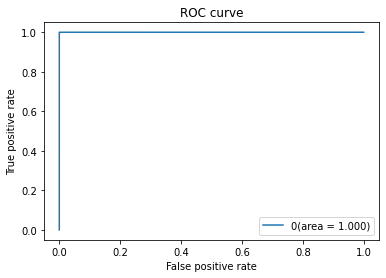

Accuracy: 0.999866
Precision: 0.999866
Recall: 0.999866
F1 score: 0.999866
Cohens kappa: 0.999733
[[103802     16]
 [    12 105885]]
Predicted     0.0     1.0     All
Actual                           
0.0        103802      16  103818
1.0            12  105885  105897
All        103814  105901  209715







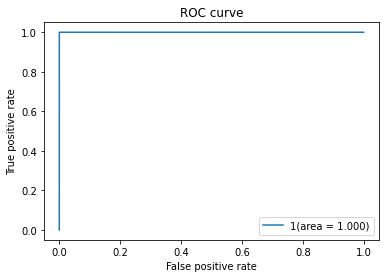

Accuracy: 0.999948
Precision: 0.999948
Recall: 0.999948
F1 score: 0.999948
Cohens kappa: 0.999855
[[159801     11]
 [     0  49903]]
Predicted     0.0    1.0     All
Actual                          
0.0        159801     11  159812
1.0             0  49903   49903
All        159801  49914  209715







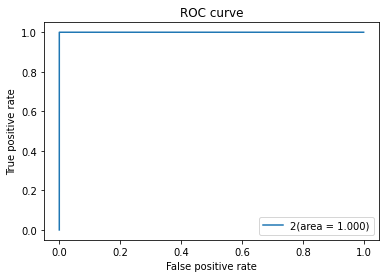

Accuracy: 0.999881
Precision: 0.999881
Recall: 0.999881
F1 score: 0.999881
Cohens kappa: 0.999755
[[121567      8]
 [    17  88123]]
Predicted     0.0    1.0     All
Actual                          
0.0        121567      8  121575
1.0            17  88123   88140
All        121584  88131  209715







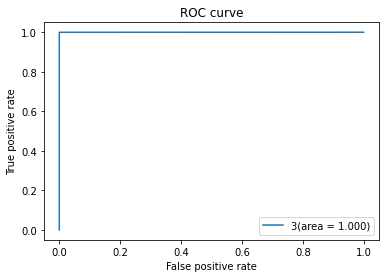

Accuracy: 0.995580
Precision: 0.995580
Recall: 0.995580
F1 score: 0.995580
Cohens kappa: 0.986678
[[165210    636]
 [   291  43578]]
Predicted     0.0    1.0     All
Actual                          
0.0        165210    636  165846
1.0           291  43578   43869
All        165501  44214  209715







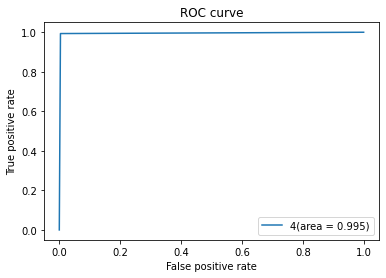

Accuracy: 0.999261
Precision: 0.999261
Recall: 0.999261
F1 score: 0.999261
Cohens kappa: 0.997158
[[177413     77]
 [    78  32147]]
Predicted     0.0    1.0     All
Actual                          
0.0        177413     77  177490
1.0            78  32147   32225
All        177491  32224  209715







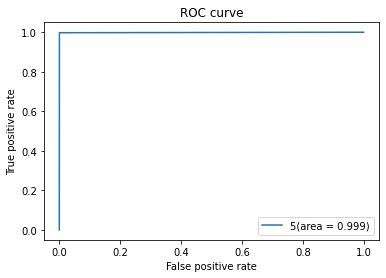

Accuracy: 0.999380
Precision: 0.999380
Recall: 0.999380
F1 score: 0.999380
Cohens kappa: 0.998752
[[113289    100]
 [    30  96296]]
Predicted     0.0    1.0     All
Actual                          
0.0        113289    100  113389
1.0            30  96296   96326
All        113319  96396  209715







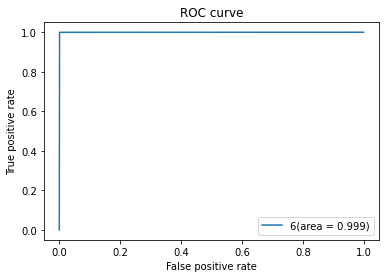

In [ ]:
%matplotlib inline

for i in range(0,7):
    
    accuracy = accuracy_score(y_test[i], Y_pred[i])
    print('Accuracy: %f' % accuracy)

    # precision tp / (tp + fp)
    precision = precision_score(y_test[i], Y_pred[i], average='micro')
    print('Precision: %f' % precision)

    # recall: tp / (tp + fn)
    recall = recall_score(y_test[i], Y_pred[i], average='micro')
    print('Recall: %f' % recall)

    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test[i], Y_pred[i], average='micro')
    print('F1 score: %f' % f1)

    # kappa
    kappa = cohen_kappa_score(y_test[i], Y_pred[i])
    print('Cohens kappa: %f' % kappa)

    # ROC AUC
    # auc = roc_auc_score(Yt_1, p_1)
    # print('ROC AUC: %f' % auc)
    
    fp, tp, thresholds_keras = roc_curve(y_test[i], Y_pred[i])
    
    auc_rf = auc(fp,tp)
    plt.plot(fp,tp,label=str(i)+"(area = {:.3f})".format(auc_rf))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')

    # confusion matrix
    matrix = confusion_matrix(y_test[i], Y_pred[i])
    print(matrix)

    exp_series = pd.Series(y_test[i])
    pred_series = pd.Series(Y_pred[i])
    print(pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print("\n\n\n\n")
    # plt.savefig('/content/drive/MyDrive/ROC'+str(j)+'.png')
    plt.show()
    

In [ ]:
pred1 = model1(df.values)
pred2 = model2(df.values)
pred3 = model3(df.values)
pred4 = model4(df.values)
pred5 = model5(df.values)
pred6 = model6(df.values)
pred7 = model7(df.values)

preds = []

for i in range(0,len(pred1)):
  pred = []
  pred.extend(pred1[i])
  pred.extend(pred2[i])
  pred.extend(pred3[i])
  pred.extend(pred4[i])
  pred.extend(pred5[i])
  pred.extend(pred6[i])
  pred.extend(pred7[i])
  preds.append(pred)

print(preds[1])

[-0.005952783778329973, 1.0059492389108478, -0.0068540225876603245, 1.006854566399717, 0.9959572450244534, 0.004042877523475319, 1.0031689798728394, -0.0031678582162726343, 1.0064749498456678, -0.0064754597094029975, 0.9936869832325996, 0.006315886368170709, -0.02118547362165657, 1.0211852839002304]


In [ ]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:

clf = MultiOutputClassifier(GaussianNB()).fit(preds, Yd)
print(clf.predict(preds[-2:]))

[[1. 1. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0. 0.]]


In [ ]:
pred1 = model1(dftest.values)
pred2 = model2(dftest.values)
pred3 = model3(dftest.values)
pred4 = model4(dftest.values)
pred5 = model5(dftest.values)
pred6 = model6(dftest.values)
pred7 = model7(dftest.values)

preds = []

for i in range(0,len(pred1)):
  pred = []
  pred.extend(pred1[i])
  pred.extend(pred2[i])
  pred.extend(pred3[i])
  pred.extend(pred4[i])
  pred.extend(pred5[i])
  pred.extend(pred6[i])
  pred.extend(pred7[i])
  preds.append(pred)

print(preds[1])

[0.010385799460166822, 0.9896238544776708, -0.0006458453437900857, 1.0006403010097387, 1.0045613343039816, -0.004560316352368865, 1.0161327454693776, -0.016139477304363936, 0.9907444270175247, 0.009248030753955305, 1.0462271747772363, -0.04623358720262161, 0.03528895167244883, 0.9647220866513138]


In [ ]:
y_pred = clf.predict(preds)

In [ ]:
y_test = pd.DataFrame(Ydtest)
y_test.head()

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y_pred = pd.DataFrame(y_pred)
Y_pred.head()

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

Accuracy: 0.999928
Precision: 0.999928
Recall: 0.999928
F1 score: 0.999928
Cohens kappa: 0.999842
[[ 72476      6]
 [     9 137224]]
Predicted    0.0     1.0     All
Actual                          
0.0        72476       6   72482
1.0            9  137224  137233
All        72485  137230  209715







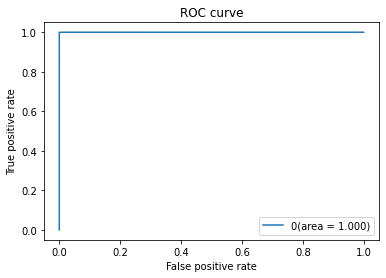

Accuracy: 0.999819
Precision: 0.999819
Recall: 0.999819
F1 score: 0.999819
Cohens kappa: 0.999638
[[103801     17]
 [    21 105876]]
Predicted     0.0     1.0     All
Actual                           
0.0        103801      17  103818
1.0            21  105876  105897
All        103822  105893  209715







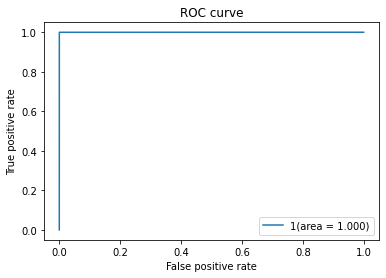

Accuracy: 0.999933
Precision: 0.999933
Recall: 0.999933
F1 score: 0.999933
Cohens kappa: 0.999816
[[159800     12]
 [     2  49901]]
Predicted     0.0    1.0     All
Actual                          
0.0        159800     12  159812
1.0             2  49901   49903
All        159802  49913  209715







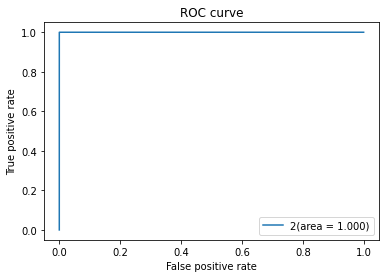

Accuracy: 0.999857
Precision: 0.999857
Recall: 0.999857
F1 score: 0.999857
Cohens kappa: 0.999706
[[121561     14]
 [    16  88124]]
Predicted     0.0    1.0     All
Actual                          
0.0        121561     14  121575
1.0            16  88124   88140
All        121577  88138  209715







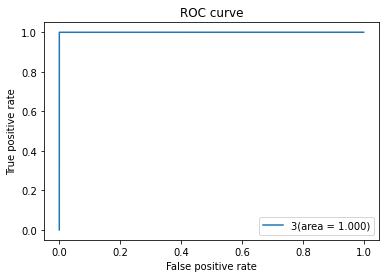

Accuracy: 0.995489
Precision: 0.995489
Recall: 0.995489
F1 score: 0.995489
Cohens kappa: 0.986424
[[165119    727]
 [   219  43650]]
Predicted     0.0    1.0     All
Actual                          
0.0        165119    727  165846
1.0           219  43650   43869
All        165338  44377  209715







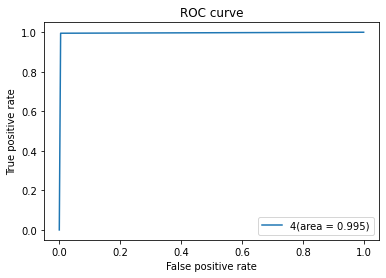

Accuracy: 0.998174
Precision: 0.998174
Recall: 0.998174
F1 score: 0.998174
Cohens kappa: 0.992951
[[177454     36]
 [   347  31878]]
Predicted     0.0    1.0     All
Actual                          
0.0        177454     36  177490
1.0           347  31878   32225
All        177801  31914  209715







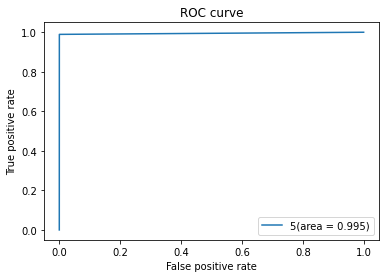

Accuracy: 0.999399
Precision: 0.999399
Recall: 0.999399
F1 score: 0.999399
Cohens kappa: 0.998790
[[113306     83]
 [    43  96283]]
Predicted     0.0    1.0     All
Actual                          
0.0        113306     83  113389
1.0            43  96283   96326
All        113349  96366  209715







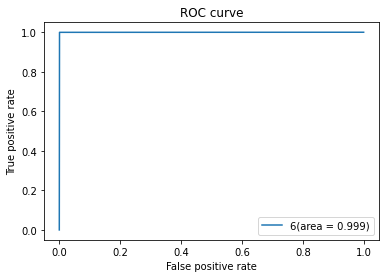

In [ ]:
%matplotlib inline

for i in range(0,7):
    
    accuracy = accuracy_score(y_test[i], Y_pred[i])
    print('Accuracy: %f' % accuracy)

    # precision tp / (tp + fp)
    precision = precision_score(y_test[i], Y_pred[i], average='micro')
    print('Precision: %f' % precision)

    # recall: tp / (tp + fn)
    recall = recall_score(y_test[i], Y_pred[i], average='micro')
    print('Recall: %f' % recall)

    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test[i], Y_pred[i], average='micro')
    print('F1 score: %f' % f1)

    # kappa
    kappa = cohen_kappa_score(y_test[i], Y_pred[i])
    print('Cohens kappa: %f' % kappa)

    # ROC AUC
    # auc = roc_auc_score(Yt_1, p_1)
    # print('ROC AUC: %f' % auc)
    
    fp, tp, thresholds_keras = roc_curve(y_test[i], Y_pred[i])
    
    auc_rf = auc(fp,tp)
    plt.plot(fp,tp,label=str(i)+"(area = {:.3f})".format(auc_rf))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')

    # confusion matrix
    matrix = confusion_matrix(y_test[i], Y_pred[i])
    print(matrix)

    exp_series = pd.Series(y_test[i])
    pred_series = pd.Series(Y_pred[i])
    print(pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print("\n\n\n\n")
    # plt.savefig('/content/drive/MyDrive/ROC'+str(j)+'.png')
    plt.show()
    

In [ ]:
pred1 = model1(df.values)
pred2 = model2(df.values)
pred3 = model3(df.values)
pred4 = model4(df.values)
pred5 = model5(df.values)
pred6 = model6(df.values)
pred7 = model7(df.values)

preds = []

for i in range(0,len(pred1)):
  pred = []
  pred.extend(pred1[i])
  pred.extend(pred2[i])
  pred.extend(pred3[i])
  pred.extend(pred4[i])
  pred.extend(pred5[i])
  pred.extend(pred6[i])
  pred.extend(pred7[i])
  preds.append(pred)

print(preds[1])

[-0.005952783778329973, 1.0059492389108478, -0.0068540225876603245, 1.006854566399717, 0.9959572450244534, 0.004042877523475319, 1.0031689798728394, -0.0031678582162726343, 1.0064749498456678, -0.0064754597094029975, 0.9936869832325996, 0.006315886368170709, -0.02118547362165657, 1.0211852839002304]


In [ ]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:

clf = MultiOutputClassifier(LogisticRegression()).fit(preds, Yd)
print(clf.predict(preds[-2:]))

[[1. 1. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0. 0.]]


In [ ]:
pred1 = model1(dftest.values)
pred2 = model2(dftest.values)
pred3 = model3(dftest.values)
pred4 = model4(dftest.values)
pred5 = model5(dftest.values)
pred6 = model6(dftest.values)
pred7 = model7(dftest.values)

preds = []

for i in range(0,len(pred1)):
  pred = []
  pred.extend(pred1[i])
  pred.extend(pred2[i])
  pred.extend(pred3[i])
  pred.extend(pred4[i])
  pred.extend(pred5[i])
  pred.extend(pred6[i])
  pred.extend(pred7[i])
  preds.append(pred)

print(preds[1])

[0.010385799460166822, 0.9896238544776708, -0.0006458453437900857, 1.0006403010097387, 1.0045613343039816, -0.004560316352368865, 1.0161327454693776, -0.016139477304363936, 0.9907444270175247, 0.009248030753955305, 1.0462271747772363, -0.04623358720262161, 0.03528895167244883, 0.9647220866513138]


In [ ]:
y_pred = clf.predict(preds)

In [ ]:
y_test = pd.DataFrame(Ydtest)
y_test.head()

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y_pred = pd.DataFrame(y_pred)
Y_pred.head()

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

Accuracy: 0.999924
Precision: 0.999924
Recall: 0.999924
F1 score: 0.999924
Cohens kappa: 0.999831
[[ 72472     10]
 [     6 137227]]
Predicted    0.0     1.0     All
Actual                          
0.0        72472      10   72482
1.0            6  137227  137233
All        72478  137237  209715







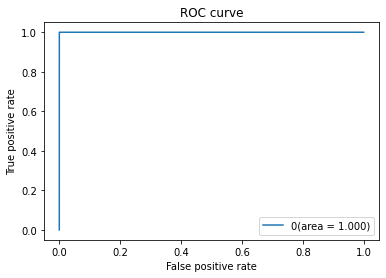

Accuracy: 0.999866
Precision: 0.999866
Recall: 0.999866
F1 score: 0.999866
Cohens kappa: 0.999733
[[103802     16]
 [    12 105885]]
Predicted     0.0     1.0     All
Actual                           
0.0        103802      16  103818
1.0            12  105885  105897
All        103814  105901  209715







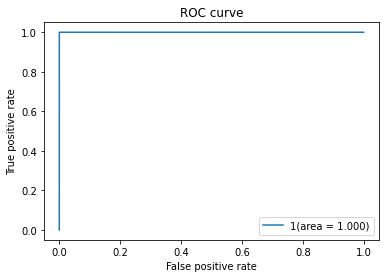

Accuracy: 0.999938
Precision: 0.999938
Recall: 0.999938
F1 score: 0.999938
Cohens kappa: 0.999829
[[159799     13]
 [     0  49903]]
Predicted     0.0    1.0     All
Actual                          
0.0        159799     13  159812
1.0             0  49903   49903
All        159799  49916  209715







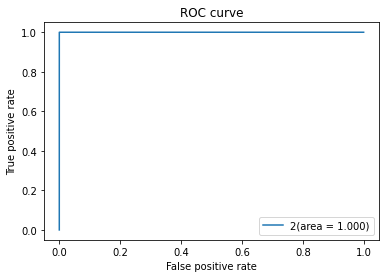

Accuracy: 0.999862
Precision: 0.999862
Recall: 0.999862
F1 score: 0.999862
Cohens kappa: 0.999716
[[121566      9]
 [    20  88120]]
Predicted     0.0    1.0     All
Actual                          
0.0        121566      9  121575
1.0            20  88120   88140
All        121586  88129  209715







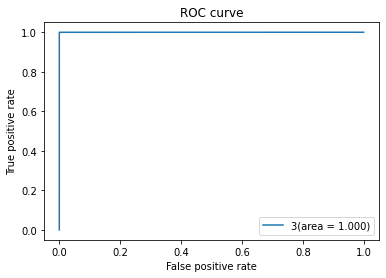

Accuracy: 0.995356
Precision: 0.995356
Recall: 0.995356
F1 score: 0.995356
Cohens kappa: 0.985961
[[165363    483]
 [   491  43378]]
Predicted     0.0    1.0     All
Actual                          
0.0        165363    483  165846
1.0           491  43378   43869
All        165854  43861  209715







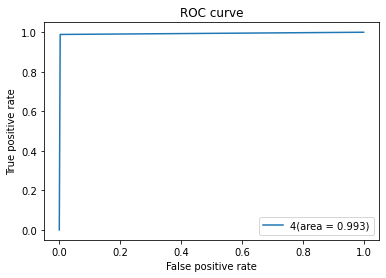

Accuracy: 0.999161
Precision: 0.999161
Recall: 0.999161
F1 score: 0.999161
Cohens kappa: 0.996772
[[177419     71]
 [   105  32120]]
Predicted     0.0    1.0     All
Actual                          
0.0        177419     71  177490
1.0           105  32120   32225
All        177524  32191  209715







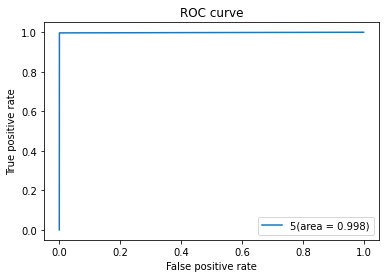

Accuracy: 0.999371
Precision: 0.999371
Recall: 0.999371
F1 score: 0.999371
Cohens kappa: 0.998733
[[113286    103]
 [    29  96297]]
Predicted     0.0    1.0     All
Actual                          
0.0        113286    103  113389
1.0            29  96297   96326
All        113315  96400  209715







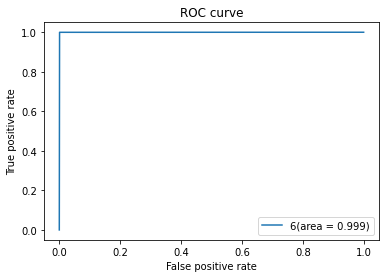

In [ ]:
%matplotlib inline

for i in range(0,7):
    
    accuracy = accuracy_score(y_test[i], Y_pred[i])
    print('Accuracy: %f' % accuracy)

    # precision tp / (tp + fp)
    precision = precision_score(y_test[i], Y_pred[i], average='micro')
    print('Precision: %f' % precision)

    # recall: tp / (tp + fn)
    recall = recall_score(y_test[i], Y_pred[i], average='micro')
    print('Recall: %f' % recall)

    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test[i], Y_pred[i], average='micro')
    print('F1 score: %f' % f1)

    # kappa
    kappa = cohen_kappa_score(y_test[i], Y_pred[i])
    print('Cohens kappa: %f' % kappa)

    # ROC AUC
    # auc = roc_auc_score(Yt_1, p_1)
    # print('ROC AUC: %f' % auc)
    
    fp, tp, thresholds_keras = roc_curve(y_test[i], Y_pred[i])
    
    auc_rf = auc(fp,tp)
    plt.plot(fp,tp,label=str(i)+"(area = {:.3f})".format(auc_rf))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')

    # confusion matrix
    matrix = confusion_matrix(y_test[i], Y_pred[i])
    print(matrix)

    exp_series = pd.Series(y_test[i])
    pred_series = pd.Series(Y_pred[i])
    print(pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print("\n\n\n\n")
    # plt.savefig('/content/drive/MyDrive/ROC'+str(j)+'.png')
    plt.show()
    

In [ ]:
pred1 = model1(df.values)
pred2 = model2(df.values)
pred3 = model3(df.values)
pred4 = model4(df.values)
pred5 = model5(df.values)
pred6 = model6(df.values)
pred7 = model7(df.values)

preds = []

for i in range(0,len(pred1)):
  pred = []
  pred.extend(pred1[i])
  pred.extend(pred2[i])
  pred.extend(pred3[i])
  pred.extend(pred4[i])
  pred.extend(pred5[i])
  pred.extend(pred6[i])
  pred.extend(pred7[i])
  preds.append(pred)

print(preds[1])

[-0.005952783778329973, 1.0059492389108478, -0.0068540225876603245, 1.006854566399717, 0.9959572450244534, 0.004042877523475319, 1.0031689798728394, -0.0031678582162726343, 1.0064749498456678, -0.0064754597094029975, 0.9936869832325996, 0.006315886368170709, -0.02118547362165657, 1.0211852839002304]


In [ ]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:

clf = MultiOutputClassifier(LinearDiscriminantAnalysis()).fit(preds, Yd)
print(clf.predict(preds[-2:]))

[[1. 1. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0. 0.]]


In [ ]:
pred1 = model1(dftest.values)
pred2 = model2(dftest.values)
pred3 = model3(dftest.values)
pred4 = model4(dftest.values)
pred5 = model5(dftest.values)
pred6 = model6(dftest.values)
pred7 = model7(dftest.values)

preds = []

for i in range(0,len(pred1)):
  pred = []
  pred.extend(pred1[i])
  pred.extend(pred2[i])
  pred.extend(pred3[i])
  pred.extend(pred4[i])
  pred.extend(pred5[i])
  pred.extend(pred6[i])
  pred.extend(pred7[i])
  preds.append(pred)

print(preds[1])

[0.010385799460166822, 0.9896238544776708, -0.0006458453437900857, 1.0006403010097387, 1.0045613343039816, -0.004560316352368865, 1.0161327454693776, -0.016139477304363936, 0.9907444270175247, 0.009248030753955305, 1.0462271747772363, -0.04623358720262161, 0.03528895167244883, 0.9647220866513138]


In [ ]:
y_pred = clf.predict(preds)

In [ ]:
y_test = pd.DataFrame(Ydtest)
y_test.head()

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y_pred = pd.DataFrame(y_pred)
Y_pred.head()

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

Accuracy: 0.999933
Precision: 0.999933
Recall: 0.999933
F1 score: 0.999933
Cohens kappa: 0.999852
[[ 72475      7]
 [     7 137226]]
Predicted    0.0     1.0     All
Actual                          
0.0        72475       7   72482
1.0            7  137226  137233
All        72482  137233  209715







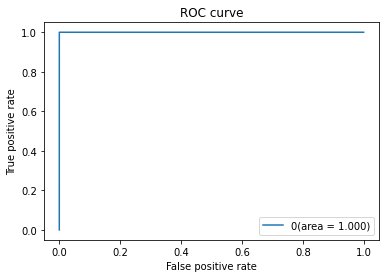

Accuracy: 0.999866
Precision: 0.999866
Recall: 0.999866
F1 score: 0.999866
Cohens kappa: 0.999733
[[103799     19]
 [     9 105888]]
Predicted     0.0     1.0     All
Actual                           
0.0        103799      19  103818
1.0             9  105888  105897
All        103808  105907  209715







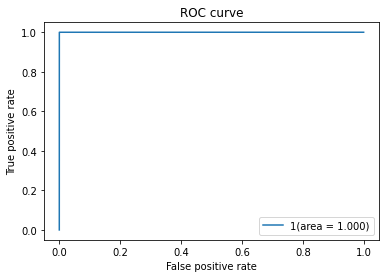

Accuracy: 0.999938
Precision: 0.999938
Recall: 0.999938
F1 score: 0.999938
Cohens kappa: 0.999829
[[159801     11]
 [     2  49901]]
Predicted     0.0    1.0     All
Actual                          
0.0        159801     11  159812
1.0             2  49901   49903
All        159803  49912  209715







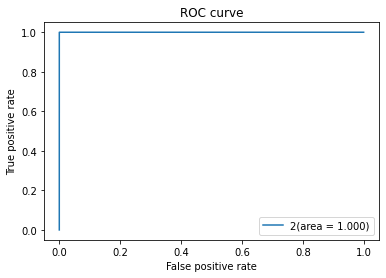

Accuracy: 0.999866
Precision: 0.999866
Recall: 0.999866
F1 score: 0.999866
Cohens kappa: 0.999726
[[121564     11]
 [    17  88123]]
Predicted     0.0    1.0     All
Actual                          
0.0        121564     11  121575
1.0            17  88123   88140
All        121581  88134  209715







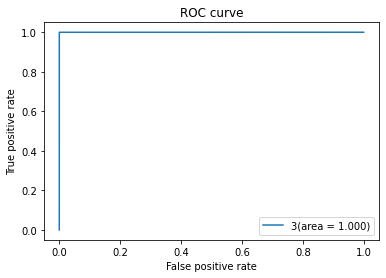

Accuracy: 0.995289
Precision: 0.995289
Recall: 0.995289
F1 score: 0.995289
Cohens kappa: 0.985703
[[165590    256]
 [   732  43137]]
Predicted     0.0    1.0     All
Actual                          
0.0        165590    256  165846
1.0           732  43137   43869
All        166322  43393  209715







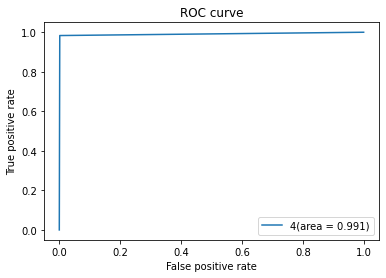

Accuracy: 0.997873
Precision: 0.997873
Recall: 0.997873
F1 score: 0.997873
Cohens kappa: 0.991792
[[177419     71]
 [   375  31850]]
Predicted     0.0    1.0     All
Actual                          
0.0        177419     71  177490
1.0           375  31850   32225
All        177794  31921  209715







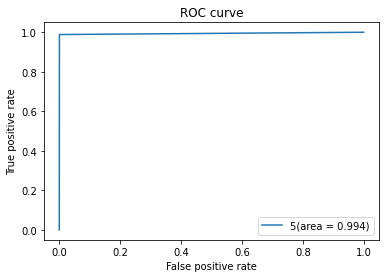

Accuracy: 0.998436
Precision: 0.998436
Recall: 0.998436
F1 score: 0.998436
Cohens kappa: 0.996852
[[113086    303]
 [    25  96301]]
Predicted     0.0    1.0     All
Actual                          
0.0        113086    303  113389
1.0            25  96301   96326
All        113111  96604  209715







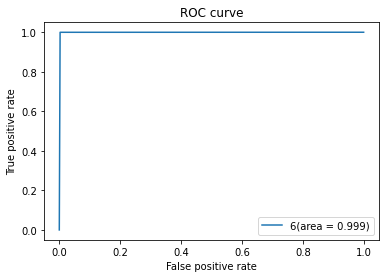

In [ ]:
%matplotlib inline

for i in range(0,7):
    
    accuracy = accuracy_score(y_test[i], Y_pred[i])
    print('Accuracy: %f' % accuracy)

    # precision tp / (tp + fp)
    precision = precision_score(y_test[i], Y_pred[i], average='micro')
    print('Precision: %f' % precision)

    # recall: tp / (tp + fn)
    recall = recall_score(y_test[i], Y_pred[i], average='micro')
    print('Recall: %f' % recall)

    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test[i], Y_pred[i], average='micro')
    print('F1 score: %f' % f1)

    # kappa
    kappa = cohen_kappa_score(y_test[i], Y_pred[i])
    print('Cohens kappa: %f' % kappa)

    # ROC AUC
    # auc = roc_auc_score(Yt_1, p_1)
    # print('ROC AUC: %f' % auc)
    
    fp, tp, thresholds_keras = roc_curve(y_test[i], Y_pred[i])
    
    auc_rf = auc(fp,tp)
    plt.plot(fp,tp,label=str(i)+"(area = {:.3f})".format(auc_rf))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')

    # confusion matrix
    matrix = confusion_matrix(y_test[i], Y_pred[i])
    print(matrix)

    exp_series = pd.Series(y_test[i])
    pred_series = pd.Series(Y_pred[i])
    print(pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print("\n\n\n\n")
    # plt.savefig('/content/drive/MyDrive/ROC'+str(j)+'.png')
    plt.show()
    